#1. Introducción
La evasión de clientes **(Churn)** es uno de los principales desafíos en empresas de telecomunicaciones, ya que impacta directamente en los **ingresos y en la sostenibilidad** del negocio. En este notebook se realiza un análisis exploratorio sobre la base de clientes de **Telecom X** con el objetivo de comprender cómo se comporta el churn y qué características están asociadas a una mayor probabilidad de cancelación.

Para ello, se trabajará con un conjunto de datos en formato *JSON*, que contiene información demográfica (género, tercera edad, pareja, dependientes), características de los servicios contratados (telefonía, internet y complementos), variables de contrato y facturación (tipo de contrato, facturación digital, método de pago) y variables numéricas de consumo (cargo mensual, cargo total y antigüedad). A través de este análisis se busca identificar **patrones y diferencias** entre clientes que permanecen y clientes que se dan de baja, generando insights accionables que permitan orientar **estrategias de retención y reducir la tasa de evasión**.

Finalmente, el proceso incluirá la importación, limpieza y tratamiento de datos (detección y corrección de inconsistencias, tipificación, normalización del JSON y manejo de valores faltantes), seguido de visualizaciones y métricas descriptivas que respalden las conclusiones obtenidas.

# 2. Limpieza y Tratamiento de Datos

##2.1. Importación de datos
Verificamos que la data falta que se normalice

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [127]:

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos = pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##2.2. Normalizacion de datos
Normalizaremos cada columna  de los datos

In [128]:

df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

Se consolidó toda la información en un solo DataFrame (df_final) con el objetivo de verificar la consistencia del dataset (valores nulos, vacíos, atípicos o inconsistentes) y realizar el tratamiento necesario para asegurar un análisis confiable. Asimismo, se resetearon los índices para evitar problemas de alineación al unir tablas normalizadas y/o concatenarlas.

In [129]:
df_final = pd.concat(
    [
        datos[['customerID','Churn']].reset_index(drop=True),
        df_customer.reset_index(drop=True),
        df_phone.reset_index(drop=True),
        df_internet.reset_index(drop=True),
        df_account.reset_index(drop=True)
    ],
    axis=1
)
df_final.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2390,3337-EUOON,,Male,0,Yes,Yes,69,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),26.00,1796.55
3470,4806-HIPDW,Yes,Female,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,68.95,68.95
2310,3217-FZDMN,Yes,Female,1,No,No,8,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.45,742.95
4435,6078-VESFR,No,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.45,849.1
772,1095-JUDTC,Yes,Female,1,No,No,47,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,95.05,4504.55
4108,5630-AHZIL,No,Female,0,No,Yes,3,Yes,No,DSL,...,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.50,177.4
5284,7218-HKQFK,Yes,Male,0,Yes,No,2,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,167.5
2032,2867-UIMSS,Yes,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.50,80.5
2660,3705-PSNGL,Yes,Male,0,No,No,45,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.40,930.45
6374,8755-IWJHN,No,Male,1,Yes,No,69,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.35,6382


Ya que no se puede ver todas las columnas del df utilizaremos  `.T ` para poder verificar que las columnas esten completas

In [130]:
df_final.sample(10).T

,6747,4017,258,5597,2803,6706,2139,6156,6242,5681
customerID,9298-WGMRW,5495-GPSRW,0378-TOVMS,7641-TQFHN,3887-PBQAO,9233-PSYHO,2995-UPRYS,8421-WZOOW,8591-NXRCV,7764-BDPEE
Churn,No,No,Yes,No,No,No,Yes,No,No,No
gender,Female,Male,Female,Male,Female,Female,Female,Female,Female,Male
SeniorCitizen,0,0,0,0,0,1,1,1,0,0
Partner,Yes,No,No,No,Yes,No,Yes,Yes,No,No
Dependents,No,No,No,Yes,Yes,No,No,Yes,No,Yes
tenure,72,20,3,39,45,45,40,57,41,3
PhoneService,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,No,No,Yes,Yes,Yes,No,No,Yes,No
InternetService,Fiber optic,No,Fiber optic,Fiber optic,No,Fiber optic,Fiber optic,Fiber optic,DSL,No


##2.3. Tratamiento de los datos

Verificación de calidad de datos
*   Se revisó la presencia de valores nulos en todas las columnas.
*   Se inspeccionaron los valores únicos por variable para detectar categorías inusuales o inconsistencias.




In [131]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [132]:
for column in df_final.columns:
    n_unicos = df_final[column].nunique(dropna=False)
    print(f"Cantidad de datos únicos en {column}: {n_unicos}")

    if n_unicos < 30:
        print("Datos únicos:")
        print(df_final[column].unique())
        print("-" * 40)


Cantidad de datos únicos en customerID: 7267
Cantidad de datos únicos en Churn: 3
Datos únicos:
['No' 'Yes' '']
----------------------------------------
Cantidad de datos únicos en gender: 2
Datos únicos:
['Female' 'Male']
----------------------------------------
Cantidad de datos únicos en SeniorCitizen: 2
Datos únicos:
[0 1]
----------------------------------------
Cantidad de datos únicos en Partner: 2
Datos únicos:
['Yes' 'No']
----------------------------------------
Cantidad de datos únicos en Dependents: 2
Datos únicos:
['Yes' 'No']
----------------------------------------
Cantidad de datos únicos en tenure: 73
Cantidad de datos únicos en PhoneService: 2
Datos únicos:
['Yes' 'No']
----------------------------------------
Cantidad de datos únicos en MultipleLines: 3
Datos únicos:
['No' 'Yes' 'No phone service']
----------------------------------------
Cantidad de datos únicos en InternetService: 3
Datos únicos:
['DSL' 'Fiber optic' 'No']
----------------------------------------
C

###2.3.1. Tratamiento de inconsistencias en Churn

Se identificó que la variable Churn presentaba registros vacíos.

In [133]:
df_final[df_final["Churn"] == ""].T

,30,75,96,98,175,219,312,351,368,374,...,7058,7061,7062,7143,7155,7158,7180,7211,7239,7247
customerID,0047-ZHDTW,0120-YZLQA,0154-QYHJU,0162-RZGMZ,0274-VVQOQ,0328-IBUPK,0448-YZNZE,0510-EXSMQ,0530-HBKHZ,0534-JRNIG,...,9717-WXVSB,9722-ZVQUQ,9724-BFUOP,9825-GXXPV,9839-SEMQN,9840-GSRFX,9872-RZQQB,9920-GNDMB,9955-RVWSC,9966-VYRTZ
Churn,,,,,,,,,,,...,,,,,,,,,,
gender,Female,Male,Male,Female,Male,Female,Male,Female,Female,Female,...,Male,Female,Female,Male,Male,Female,Female,Male,Female,Female
SeniorCitizen,0,0,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Partner,No,No,No,No,Yes,Yes,Yes,No,Yes,No,...,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
Dependents,No,No,No,No,No,Yes,No,No,No,No,...,No,Yes,No,Yes,Yes,No,No,No,Yes,Yes
tenure,11,71,29,5,65,51,27,9,1,6,...,1,14,8,59,5,14,49,9,67,31
PhoneService,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
MultipleLines,Yes,No,No,No,Yes,No phone service,Yes,No,No phone service,Yes,...,No,No,Yes,No,Yes,Yes,No phone service,Yes,No,No
InternetService,Fiber optic,No,DSL,DSL,Fiber optic,DSL,Fiber optic,Fiber optic,DSL,Fiber optic,...,No,Fiber optic,Fiber optic,No,DSL,DSL,DSL,Fiber optic,No,No


Para validar el impacto:

*    Se contabilizaron los registros con Churn vacío.

*    Se comparó su proporción respecto al total del dataset.

In [134]:
df_final["Churn"].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


Dado que estos registros representaban un porcentaje reducido y constituían una inconsistencia en la variable objetivo, se decidió eliminarlos para evitar sesgos o errores en el análisis posterior

In [135]:
#Verificaremos el porcentaje de datos en blanco en la columna Churn ya que esta es una columna fundamental para el analisis
224/(5174+1869+224)*100

3.0824274115866244

In [136]:
#Siendo solo 3% se decide borrar esta data, cambiamos los datos vacios ('') por NA y posteriormente se borrara esta data
df_final['Churn'] = df_final['Churn'].replace('',pd.NA)
df_final['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
<NA>,224


In [137]:
#Borramos la data vacia
df_final.dropna(subset=['Churn'],inplace=True)

In [138]:
#Verificamos que la columna churn no cuenta con Vacios
df_final['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869


In [139]:
#Vemos que hay valors 0 en la columna tenure, lo cual significa que los clientes han estado con la empresa practicamente 0 meses,
#probablemente por que sean clientes nuevos o recien activados, esto se verifica con Churn=No
df_final[df_final["tenure"] == 0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


###2.3.2. Consistencia de variables relacionadas con internet y telefono

Se verificó la coherencia de categorías como **No internet service**. Se observó que esta etiqueta se mantenía de forma consistente en todas las variables relacionadas con servicios de internet y con conteos equivalentes, lo cual confirma la integridad de esta codificación.

In [140]:
df_final['PhoneService'].value_counts()

,count
PhoneService,
Yes,6361
No,682


In [141]:
df_final['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


###2.3.3. Tratamiento de valores vacíos en Charges.Total

Se detectaron valores vacíos en Charges.Total. Tras revisar el contenido, se concluyó que correspondían a un número muy pequeño de filas **(11 registros)**.

In [142]:
df_final['Charges.Total'].value_counts()

,count
Charges.Total,
20.2,11
,11
19.75,9
19.9,8
19.65,8
...,...
829.55,1
625.65,1
462.8,1


In [143]:
df_final[df_final["Charges.Total"] == ' ']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Debido a su baja proporción y para mantener consistencia en variables monetarias, se decidió eliminarlas, ya que su impacto sobre el análisis global es **mínimo**.

In [144]:
#Siendo estso 11 filas se eliminaran ya que no afectan mucho en la data completa
df_final['Charges.Total'] = df_final['Charges.Total'].replace(r'^\s*$', pd.NA, regex=True)
df_final = df_final.dropna(subset=["Charges.Total"]).copy()
df_final["Charges.Total"] = pd.to_numeric(df_final["Charges.Total"], errors="coerce")

In [145]:
df_final['Charges.Total'].value_counts()

,count
Charges.Total,
20.20,11
19.75,9
19.90,8
19.65,8
20.05,8
...,...
2058.50,1
829.55,1
625.65,1


###2.3.4. Conversión de tipos de datos

Se identificó que algunas columnas monetarias estaban en tipo object pese a representar valores numéricos (por ejemplo, Charges.Total). Por ello, se realizó la conversión a tipo numérico para permitir cálculos estadísticos y visualizaciones sin errores. Luego de este tratamiento, se confirmó que la estructura de datos quedaba consistente.

In [146]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

###2.3.5. Transformación de variables binarias
Para facilitar el análisis (y posteriores modelos si se requieren), se transformaron variables tipo Yes/No a 1/0.

In [147]:
df_final['Churn'] = df_final['Churn'].map({'No': 0, 'Yes': 1})

In [148]:
df_final['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [149]:
df_final['Partner'] = df_final['Partner'].map({'No': 0, 'Yes': 1})

In [150]:
df_final['Partner'].value_counts()

,count
Partner,
0,3639
1,3393


In [151]:
df_final['Dependents'] = df_final['Dependents'].map({'No': 0, 'Yes': 1})

In [152]:
df_final['Dependents'].value_counts()

,count
Dependents,
0,4933
1,2099


In [153]:
df_final['PhoneService'] = df_final['PhoneService'].map({'No': 0, 'Yes': 1})

In [154]:
df_final['PhoneService'].value_counts()

,count
PhoneService,
1,6352
0,680


In [155]:
df_final['PaperlessBilling'] = df_final['PaperlessBilling'].map({'No': 0, 'Yes': 1})

In [156]:
df_final['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
1,4168
0,2864


Luego de cambiar los datos de Yes o No a binarios (1,0)
Comenzaremos con el cambio de los datos numericos

In [157]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [158]:
df_final['tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42])

###2.3.6. Creación de variable derivada: Cuentas_Diarias

Se agregó la columna Cuentas_Diarias, calculada a partir del cargo mensual dividido entre 30, con el objetivo de contar con una métrica diaria comparable que facilite interpretaciones operativas.

In [159]:
df_final['Cuentas_Diarias'] = (df_final['Charges.Monthly']/30).round(2)

###2.3.7. Renombrado y traducción

Finalmente, se tradujeron nombres de columnas y categorías para que la interpretación de los resultados sea más clara y comprensible dentro del informe.

In [160]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [161]:
df_final.rename(columns={
    "customerID": "id_cliente",
    "Churn": "churn",
    "gender": "genero",
    "SeniorCitizen": "mayor_65",
    "Partner": "tiene_pareja",
    "Dependents": "tiene_dependientes",
    "tenure": "antiguedad_meses",
    "PhoneService": "servicio_telefonico",
    "MultipleLines": "multiples_lineas",
    "InternetService": "servicio_internet",
    "OnlineSecurity": "seguridad_online",
    "OnlineBackup": "backup_online",
    "DeviceProtection": "proteccion_dispositivo",
    "TechSupport": "soporte_tecnico",
    "StreamingTV": "streaming_tv",
    "StreamingMovies": "streaming_peliculas",
    "Contract": "tipo_contrato",
    "PaperlessBilling": "factura_digital",
    "PaymentMethod": "metodo_pago",
    "Charges.Monthly": "cargo_mensual",
    "Charges.Total": "cargo_total",},inplace=True)

In [162]:
df_final.head()

,id_cliente,churn,genero,mayor_65,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefonico,multiples_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [163]:
df_final['metodo_pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [164]:
mapeo_pago = {
    "Mailed check": "Cheque por correo",
    "Electronic check": "Cheque electrónico",
    "Credit card (automatic)": "Tarjeta de crédito (automático)",
    "Bank transfer (automatic)": "Transferencia bancaria (automático)"
}
df_final["metodo_pago"] = df_final["metodo_pago"].map(mapeo_pago)

In [165]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7032 non-null   object 
 1   churn                   7032 non-null   int64  
 2   genero                  7032 non-null   object 
 3   mayor_65                7032 non-null   int64  
 4   tiene_pareja            7032 non-null   int64  
 5   tiene_dependientes      7032 non-null   int64  
 6   antiguedad_meses        7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   int64  
 8   multiples_lineas        7032 non-null   object 
 9   servicio_internet       7032 non-null   object 
 10  seguridad_online        7032 non-null   object 
 11  backup_online           7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  streaming_tv            7032 non-null   objec

#3. FUNCIONES Y VARIABLES

##3.1. COLORES

In [166]:
# Paleta base (neutros + acento)
COLORS = {
    "accent":   "#D62828",  # rojo/acento
    "dark":     "#1F1F1F",  # texto/títulos
    "gray":     "#6B7280",  # texto secundario
    "lightgray":"#E5E7EB",  # fondos suaves
    "white":    "#FFFFFF",
}

# Paleta para variables categóricas (pastel/barras con varias categorías)
PALETTE_CATEG = [
    "#2563EB",  # azul
    "#EC4899",  # rosa
    "#10B981",  # verde
    "#F59E0B",  # ámbar
    "#8B5CF6",  # morado
    "#06B6D4",  # celeste
    "#F97316",  # naranja
    "#64748B",  # gris azulado
]


##3.2. HISTOGRAMAS Y BOXPLOT

In [167]:
def plot_hist_box_meses(
    df,
    col="antiguedad_meses",
    bins=24,
    xticks=None,
    accent=None,
    dpi=120
):
    accent = accent or COLORS["accent"]
    dark = COLORS["dark"]
    gray = COLORS["gray"]
    lightgray = COLORS["lightgray"]

    x = df[col].dropna()

    # Estadísticos
    n = int(x.count())
    mean = x.mean()
    std = x.std()
    q1 = x.quantile(0.25)
    med = x.quantile(0.50)
    q3 = x.quantile(0.75)
    xmin = x.min()
    xmax = x.max()

    fig, axs = plt.subplots(1, 2, figsize=(18, 5), dpi=dpi)
    fig.patch.set_facecolor("white")

    # Deja espacio a la derecha del histograma para el cuadro de texto
    fig.subplots_adjust(wspace=0.08, right=0.98)

    # ---------------- HISTOGRAMA ----------------
    ax = axs[0]
    ax.hist(x, bins=bins, edgecolor="white", alpha=0.95, color=accent)

    ax.set_title(f"Distribución de {col} (meses)".replace("_", " "), fontweight="bold", color=dark)
    ax.set_xlabel("Meses", color=dark)
    ax.set_ylabel("Frecuencia", color=dark)

    if xticks is not None:
        ax.set_xticks(xticks)

    ax.grid(axis="y", alpha=0.25, color=gray)

    # Líneas Q1 / Mediana / Q3
    ax.axvline(q1, color=dark, linestyle="--", linewidth=1.5)
    ax.axvline(med, color=dark, linestyle="-", linewidth=2.2)
    ax.axvline(q3, color=dark, linestyle="--", linewidth=1.5)

    # Anotaciones (usando el alto actual del eje)
    ymax = ax.get_ylim()[1]
    ax.annotate(f"Mediana={med:.0f}", xy=(med, ymax*0.75), xytext=(med+3, ymax*0.92),
                arrowprops=dict(arrowstyle="->", color=dark, lw=1),
                fontsize=10, color=dark)
    ax.annotate(f"Q3={q3:.0f}", xy=(q3, ymax*0.85), xytext=(q3+2, ymax*0.95),
                arrowprops=dict(arrowstyle="->", color=dark, lw=1),
                fontsize=10, color=dark)

    # Cuadro de resumen fuera del histograma (lado derecho del eje)
    resumen = (
        f"N = {n}\n"
        f"Media = {mean:.2f}\n"
        f"Desv. est. = {std:.2f}\n"
        f"Mín = {xmin:.0f} | Máx = {xmax:.0f}\n"
        f"Q1 = {q1:.0f} | Med = {med:.0f} | Q3 = {q3:.0f}"
    )
    ax.text(
        0.45, 0.5, resumen,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=dark,
        bbox=dict(boxstyle="round,pad=0.5", facecolor=lightgray, edgecolor="none", alpha=0.95)
    )

    # Texto breve abajo (no tapa barras)
    ax.text(
    0.02, 0.03,
    "El 50% está entre Q1 y Q3.\nLa mediana divide la base en dos mitades.",
    transform=ax.transAxes,
    ha="left", va="bottom",
    fontsize=9, color=COLORS["dark"]
    )

    # ---------------- BOXPLOT ----------------
    ax2 = axs[1]
    ax2.boxplot(
        x, vert=False, showmeans=True,
        boxprops=dict(color=dark),
        medianprops=dict(color=accent, linewidth=2.2),
        whiskerprops=dict(color=dark),
        capprops=dict(color=dark),
        meanprops=dict(marker="^", markerfacecolor=accent, markeredgecolor=dark, markersize=8),
        flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor=dark, alpha=0.6, markersize=5)
    )
    ax2.set_title("Boxplot (media y mediana)", fontweight="bold", color=dark)
    ax2.set_xlabel("Meses", color=dark)
    ax2.set_yticks([])  # No tiene sentido "Cliente" aquí
    ax2.grid(axis="x", alpha=0.25, color=gray)

    ax2.annotate(
        f"Mediana = {med:.0f} meses",
        xy=(med, 1),
        xytext=(med+8, 1.12),
        arrowprops=dict(arrowstyle="->", color=dark, lw=1),
        fontsize=10, color=dark
    )

    return fig

In [168]:
def plot_hist_box_cargo_mensual(
    df,
    col="cargo_mensual",
    bins=16,
    xticks=None,
    x_label=None,
    title_left=None,
    title_right=None,
    accent=None,
    currency_prefix="S/ ",
    dpi=120
):
    accent = accent or COLORS["accent"]
    dark = COLORS["dark"]
    gray = COLORS["gray"]
    lightgray = COLORS["lightgray"]

    x = df[col].dropna()

    # Estadísticos
    n = int(x.count())
    mean = x.mean()
    std = x.std()
    q1 = x.quantile(0.25)
    med = x.quantile(0.50)
    q3 = x.quantile(0.75)
    xmin = x.min()
    xmax = x.max()

    # Textos
    x_label = x_label or col.replace("_", " ").title()
    title_left = title_left or f"Distribución de {col}".replace("_", " ")
    title_right = title_right or "Boxplot (media y mediana)"

    fig, axs = plt.subplots(1, 2, figsize=(18, 5), dpi=dpi)
    fig.patch.set_facecolor("white")
    fig.subplots_adjust(wspace=0.08, right=0.98)

    # ---------------- HISTOGRAMA ----------------
    ax = axs[0]
    ax.hist(x, bins=bins, edgecolor="white", alpha=0.95, color=accent)

    ax.set_title(title_left, fontweight="bold", color=dark)
    ax.set_xlabel(x_label, color=dark)
    ax.set_ylabel("Frecuencia", color=dark)

    if xticks is not None:
        ax.set_xticks(xticks)

    ax.grid(axis="y", alpha=0.25, color=gray)

    # Líneas Q1 / Mediana / Q3
    ax.axvline(q1, color=dark, linestyle="--", linewidth=1.5)
    ax.axvline(med, color=dark, linestyle="-", linewidth=2.2)
    ax.axvline(q3, color=dark, linestyle="--", linewidth=1.5)

    ymax = ax.get_ylim()[1]

    ax.annotate(f"Mediana={med:.2f}", xy=(med, ymax*0.75), xytext=(med, ymax*0.92),
                arrowprops=dict(arrowstyle="->", color=dark, lw=1),
                fontsize=10, color=dark, ha="left")

    # Resumen fuera del histograma (derecha)
    resumen = (
        f"N = {n}\n"
        f"Media = {currency_prefix}{mean:.2f}\n"
        f"Desv. est. = {std:.2f}\n"
        f"Mín = {currency_prefix}{xmin:.2f} | Máx = {currency_prefix}{xmax:.2f}\n"
        f"Q1 = {currency_prefix}{q1:.2f} | Med = {currency_prefix}{med:.2f} | Q3 = {currency_prefix}{q3:.2f}"
    )
    ax.text(
        0.6, 0.75, resumen,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=dark,
        bbox=dict(boxstyle="round,pad=0.5", facecolor=lightgray, edgecolor="none", alpha=0.95)
    )

    # Nota de asimetría (media vs mediana)
    if mean < med:
        nota = "Media < Mediana → concentración en valores bajos (asimetría hacia la izquierda)."
    elif mean > med:
        nota = "Media > Mediana → cola hacia valores altos (asimetría hacia la derecha)."
    else:
        nota = "Media ≈ Mediana → distribución aproximadamente simétrica."

    ax.text(
        0.02, 0.03, nota,
        transform=ax.transAxes,
        ha="left", va="bottom",
        fontsize=9, color="#000000"
    )

    # ---------------- BOXPLOT ----------------
    ax2 = axs[1]
    ax2.boxplot(
        x, vert=False, showmeans=True,
        boxprops=dict(color=dark),
        medianprops=dict(color=accent, linewidth=2.2),
        whiskerprops=dict(color=dark),
        capprops=dict(color=dark),
        meanprops=dict(marker="^", markerfacecolor=accent, markeredgecolor=dark, markersize=8),
        flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor=dark, alpha=0.6, markersize=5)
    )

    ax2.set_title(title_right, fontweight="bold", color=dark)
    ax2.set_xlabel(x_label, color=dark)
    ax2.set_yticks([])
    ax2.grid(axis="x", alpha=0.25, color=gray)

    ax2.annotate(
        f"Mediana = {currency_prefix}{med:.2f}",
        xy=(med, 1),
        xytext=(med + (xmax-xmin)*0.08, 1.12),
        arrowprops=dict(arrowstyle="->", color=dark, lw=1),
        fontsize=10, color=dark
    )

    return fig


In [169]:
def plot_hist_box_cargo_total(
    df,
    col="cargo_total",
    bins=16,
    x_label="Cargo total",
    title_left="Distribución de cargo total",
    title_right="Boxplot de cargo total (media y mediana)",
    currency_prefix="S/ ",
    stats_pos=(0.75, 0.6),   # <- aquí (0.75, 0.6)
    accent=None,
    dpi=120
):
    accent = accent or COLORS["accent"]
    dark = COLORS["dark"]
    gray = COLORS["gray"]
    lightgray = COLORS["lightgray"]

    x = df[col].dropna()

    # Estadísticos
    n = int(x.count())
    mean = x.mean()
    std = x.std()
    q1 = x.quantile(0.25)
    med = x.quantile(0.50)
    q3 = x.quantile(0.75)
    xmin = x.min()
    xmax = x.max()

    fig, axs = plt.subplots(1, 2, figsize=(18, 5), dpi=dpi)
    fig.patch.set_facecolor("white")
    fig.subplots_adjust(wspace=0.12)

    # ---------------- HISTOGRAMA ----------------
    ax = axs[0]
    ax.hist(x, bins=bins, edgecolor="white", alpha=0.95, color=accent)

    ax.set_title(title_left, fontweight="bold", color=dark)
    ax.set_xlabel(x_label, color=dark)
    ax.set_ylabel("Frecuencia", color=dark)
    ax.grid(axis="y", alpha=0.25, color=gray)

    # Líneas Q1 / Mediana / Q3
    ax.axvline(q1, color=dark, linestyle="--", linewidth=1.5)
    ax.axvline(med, color=dark, linestyle="-", linewidth=2.2)
    ax.axvline(q3, color=dark, linestyle="--", linewidth=1.5)

    # Anotación cola derecha (según tu interpretación)
    ymax = ax.get_ylim()[1]
    ax.annotate(
        "Cola hacia valores altos",
        xy=(q3, ymax * 0.65),
        xytext=(q3 + (xmax - xmin) * 0.18, ymax * 0.85),
        arrowprops=dict(arrowstyle="->", color=dark, lw=1),
        fontsize=10, color=dark
    )

    # Cuadro resumen dentro del histograma en (0.75, 0.95)
    resumen = (
        f"N = {n}\n"
        f"Media = {currency_prefix}{mean:.2f}\n"
        f"Desv. est. = {std:.2f}\n"
        f"Mín = {currency_prefix}{xmin:.2f}\n"
        f"Máx = {currency_prefix}{xmax:.2f}\n"
        f"Q1 = {currency_prefix}{q1:.2f}\n"
        f"Med = {currency_prefix}{med:.2f}\n"
        f"Q3 = {currency_prefix}{q3:.2f}"
    )
    ax.text(
        stats_pos[0], stats_pos[1], resumen,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=dark,
        bbox=dict(boxstyle="round,pad=0.5", facecolor=lightgray, edgecolor="none", alpha=0.95)
    )

    # Texto interpretativo breve (auto) alineado a tu interpretación
    # (media > mediana = asimetría a la derecha)
    if mean > med:
        nota = "Media > Mediana → asimetría a la derecha (valores altos elevan el promedio)."
    elif mean < med:
        nota = "Media < Mediana → asimetría a la izquierda (valores bajos reducen el promedio)."
    else:
        nota = "Media ≈ Mediana → distribución aproximadamente simétrica."

    ax.text(
        0.02, 0.03,
        f"Rango amplio: {currency_prefix}{xmin:.2f} a {currency_prefix}{xmax:.2f}.\n{nota}",
        transform=ax.transAxes,
        ha="left", va="bottom",
        fontsize=9, color="#000000"
    )

    # ---------------- BOXPLOT ----------------
    ax2 = axs[1]
    ax2.boxplot(
        x, vert=False, showmeans=True,
        boxprops=dict(color=dark),
        medianprops=dict(color=accent, linewidth=2.2),
        whiskerprops=dict(color=dark),
        capprops=dict(color=dark),
        meanprops=dict(marker="^", markerfacecolor=accent, markeredgecolor=dark, markersize=8),
        flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor=dark, alpha=0.6, markersize=5)
    )
    ax2.set_title(title_right, fontweight="bold", color=dark)
    ax2.set_xlabel(x_label, color=dark)
    ax2.set_yticks([])
    ax2.grid(axis="x", alpha=0.25, color=gray)

    ax2.annotate(
        f"Mediana = {currency_prefix}{med:.2f}",
        xy=(med, 1),
        xytext=(med + (xmax - xmin) * 0.10, 1.12),
        arrowprops=dict(arrowstyle="->", color=dark, lw=1),
        fontsize=10, color=dark
    )

    return fig


##3.3. GRAFICOS TORTA

In [170]:

def pie_categoria_styled(
    df,
    col,
    title=None,
    figsize=(7, 6),
    palette=None,
    startangle=90,
    explode_max=True,
    bin_map=True,
    dpi=120
):
    """
    Pie chart estilizado para una variable categórica.
    - Muestra % y cantidad.
    - Si es binaria 0/1, renombra a No/Sí.
    - Resalta (explode) la categoría dominante si explode_max=True.
    - Retorna fig para usar fig.show().
    """
    palette = palette or PALETTE_CATEG
    dark = COLORS["dark"]
    gray = COLORS["gray"]
    lightgray = COLORS["lightgray"]

    # Conteos
    counts = df[col].value_counts(dropna=False)

    # 0/1 -> No/Sí
    if bin_map and set(counts.index).issubset({0, 1}):
        counts = counts.rename(index={0: "No", 1: "Sí"})

    total = counts.sum()

    # Formato de autopct: % y cantidad
    def autopct_fmt(pct):
        val = int(round(pct / 100 * total))
        return f"{pct:.1f}%\n({val})"

    # Colores
    colors = palette[:len(counts)]

    # Explode para la categoría dominante
    explode = None
    if explode_max:
        explode = [0.03] * len(counts)
        max_i = int(np.argmax(counts.values))
        explode[max_i] = 0.10

    # Crear figura
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    fig.patch.set_facecolor("white")

    wedges, texts, autotexts = ax.pie(
        counts.values,
        labels=counts.index.astype(str),
        autopct=autopct_fmt,
        startangle=startangle,
        colors=colors,
        explode=explode,
        wedgeprops=dict(edgecolor="white", linewidth=1),
        textprops={"fontsize": 10, "color": dark},
        pctdistance=0.72
    )

    # Ajustes del texto interno (% y cantidad)
    for t in autotexts:
        t.set_color("white")
        t.set_fontsize(9)
        t.set_fontweight("bold")

    # Título
    title = title or f"Distribución de {col}".replace("_", " ")
    ax.set_title(title, fontweight="bold", color=dark, pad=12)

    # Insight automático (dominante)
    top_cat = counts.index.astype(str)[0]
    top_val = counts.iloc[0]
    top_pct = (top_val / total) * 100

    insight = (
        f"Categoría dominante: {top_cat}\n"
        f"{top_pct:.1f}% ({top_val} de {total})"
    )

    ax.text(
        0.02, 0.02, insight,
        transform=ax.transAxes,
        ha="left", va="bottom",
        fontsize=10, color=dark,
        bbox=dict(boxstyle="round,pad=0.4", facecolor=lightgray, edgecolor="none", alpha=0.95)
    )

    ax.axis("equal")  # circular perfecto
    plt.tight_layout()
    return fig

##3.4. DISTRIBUCION SEGUN CHURN

In [171]:

def genero_vs_churn_styled(df_final):
    variable = "genero"

    # -------- TABLA (conteo + % por fila) --------
    conteo = pd.crosstab(df_final[variable], df_final["churn"])
    conteo = conteo.reindex(columns=[0, 1], fill_value=0)  # asegura orden 0,1
    conteo.columns = ["No churn (0)", "Churn (1)"]

    pct = pd.crosstab(df_final[variable], df_final["churn"], normalize="index") * 100
    pct = pct.reindex(columns=[0, 1], fill_value=0)
    pct.columns = ["No churn %", "Churn %"]

    tabla_final = pd.concat([conteo, pct.round(2)], axis=1)

    # Estilos (más limpios y útiles)
    styler = (
        tabla_final.style
        .set_caption("Género vs Churn (conteo y porcentaje por fila)")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        # Gradiente SOLO en % de churn (es lo que se compara)
        .background_gradient(subset=["Churn %"], cmap="Reds")
        .background_gradient(subset=["No churn %"], cmap="Greys")
        .format(precision=2)
    )

    # -------- GRÁFICO (tasa de churn %) --------
    churn_rate = df_final.groupby(variable)["churn"].mean().sort_values(ascending=False) * 100

    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=120)
    colors = ["#2563EB", "#EC4899"]  # azul/rosa para género (como querías)

    bars = ax.bar(
        churn_rate.index.astype(str),
        churn_rate.values,
        color=colors[:len(churn_rate)],
        edgecolor="white",
        linewidth=1.2,
        alpha=0.95
    )

    ax.set_title("Tasa de churn por género", fontweight="bold", color=COLORS["dark"])
    ax.set_ylabel("Churn (%)", color=COLORS["dark"])
    ax.set_xlabel("Género", color=COLORS["dark"])
    ax.grid(axis="y", alpha=0.25, color=COLORS["gray"])
    ax.set_ylim(0, churn_rate.max() * 1.25)

    # Etiquetas arriba de las barras
    ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3, fontsize=10, color=COLORS["dark"])

    # Cajita de insight automático
    diff = abs(churn_rate.max() - churn_rate.min())
    insight = f"Diferencia entre grupos: {diff:.1f} pp (muy baja)" if diff < 3 else f"Diferencia entre grupos: {diff:.1f} pp"
    ax.text(
        0.02, 0.95, insight,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=COLORS["dark"],
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    # Look limpio
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()

    return styler, fig

In [172]:
def mayor65_vs_churn_styled(df_final):
    variable = "mayor_65"

    # -------- TABLA (conteo + % por fila) --------
    tabla = pd.crosstab(df_final[variable], df_final["churn"])
    tabla = tabla.reindex(columns=[0, 1], fill_value=0)  # asegura orden 0,1
    tabla.columns = ["No churn (0)", "Churn (1)"]

    pct = pd.crosstab(df_final[variable], df_final["churn"], normalize="index") * 100
    pct = pct.reindex(columns=[0, 1], fill_value=0)
    pct.columns = ["No churn %", "Churn %"]

    tabla_final = pd.concat([tabla, pct.round(2)], axis=1)
    tabla_final.index = ["No es mayor", "Sí es mayor"]  # etiquetas limpias

    styler = (
        tabla_final.style
        .set_caption("Mayor de 65 vs Churn (conteo y porcentaje por fila)")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        # resalta comparación con churn %
        .background_gradient(subset=["Churn %"], cmap="Reds")
        .background_gradient(subset=["No churn %"], cmap="Greys")
        .format(precision=2)
    )

    # -------- GRÁFICO (tasa de churn %) --------
    churn_rate = df_final.groupby(variable)["churn"].mean().sort_values(ascending=False) * 100
    churn_rate = churn_rate.rename(index={0: "No es mayor", 1: "Sí es mayor"})

    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=120)

    # 2 colores (no saturar): gris para No, acento para Sí
    colors = [COLORS["lightgray"], COLORS["accent"]]
    ax.bar(
        churn_rate.index.astype(str),
        churn_rate.values,
        color=colors[:len(churn_rate)],
        edgecolor="white",
        linewidth=1.2,
        alpha=0.95
    )

    ax.set_title("Tasa de churn según mayor de 65", fontweight="bold", color=COLORS["dark"])
    ax.set_ylabel("Churn (%)", color=COLORS["dark"])
    ax.set_xlabel("Grupo", color=COLORS["dark"])
    ax.grid(axis="y", alpha=0.25, color=COLORS["gray"])
    ax.set_ylim(0, churn_rate.max() * 1.25)

    ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3, fontsize=10, color=COLORS["dark"])

    # Insight automático: diferencia en puntos porcentuales
    diff = churn_rate.max() - churn_rate.min()
    insight = f"Diferencia: {diff:.1f} pp (mayor riesgo en adultos mayores)"
    ax.text(
        0.02, 0.95, insight,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=COLORS["dark"],
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    # estilo limpio
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(rotation=0)
    plt.tight_layout()

    return styler, fig

In [173]:
def pareja_vs_churn_styled(df_final):
    variable = "tiene_pareja"

    # -------- TABLA (conteo + % por fila) --------
    conteo = pd.crosstab(df_final[variable], df_final["churn"])
    conteo = conteo.reindex(columns=[0, 1], fill_value=0)
    conteo.columns = ["No churn (0)", "Churn (1)"]

    pct = pd.crosstab(df_final[variable], df_final["churn"], normalize="index") * 100
    pct = pct.reindex(columns=[0, 1], fill_value=0)
    pct.columns = ["No churn %", "Churn %"]

    tabla_final = pd.concat([conteo, pct.round(2)], axis=1)
    tabla_final.index = ["No tiene pareja", "Tiene pareja"]

    styler = (
        tabla_final.style
        .set_caption("Tiene pareja vs Churn (conteo y porcentaje por fila)")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        .background_gradient(subset=["Churn %"], cmap="Reds")
        .background_gradient(subset=["No churn %"], cmap="Greys")
        .format(precision=2)
    )

    # -------- GRÁFICO (tasa de churn %) --------
    churn_rate = df_final.groupby(variable)["churn"].mean().sort_values(ascending=False) * 100
    churn_rate = churn_rate.rename(index={0: "No tiene pareja", 1: "Tiene pareja"})

    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=120)

    # Resalta el grupo con mayor churn con color acento
    # (como está ordenado descendente, el primero es el de mayor churn)
    bar_colors = [COLORS["accent"], COLORS["lightgray"]]

    ax.bar(
        churn_rate.index.astype(str),
        churn_rate.values,
        color=bar_colors[:len(churn_rate)],
        edgecolor="white",
        linewidth=1.2,
        alpha=0.95
    )

    ax.set_title("Tasa de churn según tiene pareja", fontweight="bold", color=COLORS["dark"])
    ax.set_ylabel("Churn (%)", color=COLORS["dark"])
    ax.set_xlabel("Grupo", color=COLORS["dark"])
    ax.grid(axis="y", alpha=0.25, color=COLORS["gray"])
    ax.set_ylim(0, churn_rate.max() * 1.25)

    ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3, fontsize=10, color=COLORS["dark"])

    # Insight automático: diferencia en puntos porcentuales
    diff = churn_rate.max() - churn_rate.min()
    insight = f"Diferencia: {diff:.1f} pp (mayor churn sin pareja)"
    ax.text(
        0.02, 0.95, insight,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=COLORS["dark"],
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(rotation=0)
    plt.tight_layout()

    return styler, fig

In [174]:
def dependientes_vs_churn_styled(df_final):
    variable = "tiene_dependientes"

    # -------- TABLA (conteo + % por fila) --------
    conteo = pd.crosstab(df_final[variable], df_final["churn"])
    conteo = conteo.reindex(columns=[0, 1], fill_value=0)
    conteo.columns = ["No churn (0)", "Churn (1)"]

    pct = pd.crosstab(df_final[variable], df_final["churn"], normalize="index") * 100
    pct = pct.reindex(columns=[0, 1], fill_value=0)
    pct.columns = ["No churn %", "Churn %"]

    tabla_final = pd.concat([conteo, pct.round(2)], axis=1)
    tabla_final.index = ["No tiene dependientes", "Tiene dependientes"]

    styler = (
        tabla_final.style
        .set_caption("Dependientes vs Churn (conteo y porcentaje por fila)")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        .background_gradient(subset=["Churn %"], cmap="Reds")
        .background_gradient(subset=["No churn %"], cmap="Greys")
        .format(precision=2)
    )

    # -------- GRÁFICO (tasa de churn %) --------
    churn_rate = df_final.groupby(variable)["churn"].mean().sort_values(ascending=False) * 100
    churn_rate = churn_rate.rename(index={0: "No tiene dependientes", 1: "Tiene dependientes"})

    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=120)

    # El primero tiene mayor churn (por el sort desc) -> lo resaltamos
    bar_colors = [COLORS["accent"], COLORS["lightgray"]]

    ax.bar(
        churn_rate.index.astype(str),
        churn_rate.values,
        color=bar_colors[:len(churn_rate)],
        edgecolor="white",
        linewidth=1.2,
        alpha=0.95
    )

    ax.set_title("Tasa de churn según tiene dependientes", fontweight="bold", color=COLORS["dark"])
    ax.set_ylabel("Churn (%)", color=COLORS["dark"])
    ax.set_xlabel("Grupo", color=COLORS["dark"])
    ax.grid(axis="y", alpha=0.25, color=COLORS["gray"])
    ax.set_ylim(0, churn_rate.max() * 1.25)

    ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3, fontsize=10, color=COLORS["dark"])

    diff = churn_rate.max() - churn_rate.min()
    insight = f"Diferencia: {diff:.1f} pp (mayor churn sin dependientes)"
    ax.text(
        0.02, 0.95, insight,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=COLORS["dark"],
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(rotation=0)
    plt.tight_layout()

    return styler, fig

In [175]:
def contrato_vs_churn_styled(df_final):
    variable = "tipo_contrato"

    # -------- TABLA (conteo + % por fila) --------
    conteo = pd.crosstab(df_final[variable], df_final["churn"])
    conteo = conteo.reindex(columns=[0, 1], fill_value=0)
    conteo.columns = ["No churn (0)", "Churn (1)"]

    pct = pd.crosstab(df_final[variable], df_final["churn"], normalize="index") * 100
    pct = pct.reindex(columns=[0, 1], fill_value=0)
    pct.columns = ["No churn %", "Churn %"]

    tabla_final = pd.concat([conteo, pct.round(2)], axis=1)

    # Orden recomendado (para lectura)
    order = ["Month-to-month", "One year", "Two year"]
    tabla_final = tabla_final.reindex(order)

    styler = (
        tabla_final.style
        .set_caption("Tipo de contrato vs Churn (conteo y porcentaje por fila)")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        # Aquí sí conviene resaltar churn %
        .background_gradient(subset=["Churn %"], cmap="Reds")
        .background_gradient(subset=["No churn %"], cmap="Greys")
        .format(precision=2)
    )

    # -------- GRÁFICO (tasa de churn %) --------
    churn_rate = df_final.groupby(variable)["churn"].mean() * 100
    churn_rate = churn_rate.reindex(order).sort_values(ascending=False)

    fig, ax = plt.subplots(figsize=(9, 4.8), dpi=120)

    # Colores: resaltar el contrato con mayor churn
    bar_colors = [COLORS["accent"]] + [COLORS["lightgray"]] * (len(churn_rate) - 1)

    ax.bar(
        churn_rate.index.astype(str),
        churn_rate.values,
        color=bar_colors[:len(churn_rate)],
        edgecolor="white",
        linewidth=1.2,
        alpha=0.95
    )

    ax.set_title("Tasa de churn según tipo de contrato", fontweight="bold", color=COLORS["dark"])
    ax.set_ylabel("Churn (%)", color=COLORS["dark"])
    ax.set_xlabel("Tipo de contrato", color=COLORS["dark"])
    ax.grid(axis="y", alpha=0.25, color=COLORS["gray"])
    ax.set_ylim(0, churn_rate.max() * 1.25)

    ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3, fontsize=10, color=COLORS["dark"])

    # Insight automático: reducción vs month-to-month
    mtm = churn_rate.get("Month-to-month", None)
    one = churn_rate.get("One year", None)
    two = churn_rate.get("Two year", None)

    if (mtm is not None) and (one is not None) and (two is not None):
        insight = (
            f"Month-to-month es el mayor riesgo.\n"
            f"Reducción vs mensual: 1 año = {mtm-one:.1f} pp | 2 años = {mtm-two:.1f} pp"
        )
    else:
        insight = "Contrato con mayor churn resaltado."

    ax.text(
        0.4, 0.95, insight,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=COLORS["dark"],
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(rotation=20, ha="right")
    plt.tight_layout()

    return styler, fig

In [176]:
def factura_digital_vs_churn_styled(df_final):
    variable = "factura_digital"

    # -------- TABLA (conteo + % por fila) --------
    conteo = pd.crosstab(df_final[variable], df_final["churn"])
    conteo = conteo.reindex(columns=[0, 1], fill_value=0)
    conteo.columns = ["No churn (0)", "Churn (1)"]

    pct = pd.crosstab(df_final[variable], df_final["churn"], normalize="index") * 100
    pct = pct.reindex(columns=[0, 1], fill_value=0)
    pct.columns = ["No churn %", "Churn %"]

    tabla_final = pd.concat([conteo, pct.round(2)], axis=1)
    tabla_final.index = ["No factura digital", "Factura digital"]

    styler = (
        tabla_final.style
        .set_caption("Factura digital vs Churn (conteo y porcentaje por fila)")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        .background_gradient(subset=["Churn %"], cmap="Reds")
        .background_gradient(subset=["No churn %"], cmap="Greys")
        .format(precision=2)
    )

    # -------- GRÁFICO (tasa de churn %) --------
    churn_rate = df_final.groupby(variable)["churn"].mean().sort_values(ascending=False) * 100
    churn_rate = churn_rate.rename(index={0: "No factura digital", 1: "Factura digital"})

    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=120)

    # Resalta el grupo con mayor churn (por sort desc será el primero)
    bar_colors = [COLORS["accent"], COLORS["lightgray"]]

    ax.bar(
        churn_rate.index.astype(str),
        churn_rate.values,
        color=bar_colors[:len(churn_rate)],
        edgecolor="white",
        linewidth=1.2,
        alpha=0.95
    )

    ax.set_title("Tasa de churn según facturación digital", fontweight="bold", color=COLORS["dark"])
    ax.set_ylabel("Churn (%)", color=COLORS["dark"])
    ax.set_xlabel("Grupo", color=COLORS["dark"])
    ax.grid(axis="y", alpha=0.25, color=COLORS["gray"])
    ax.set_ylim(0, churn_rate.max() * 1.25)

    ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3, fontsize=10, color=COLORS["dark"])

    diff = churn_rate.max() - churn_rate.min()
    insight = f"Diferencia: {diff:.1f} pp (mayor churn con factura digital)"
    ax.text(
        0.02, 0.95, insight,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=COLORS["dark"],
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(rotation=0)
    plt.tight_layout()

    return styler, fig


In [177]:
def metodo_pago_vs_churn_styled(df_final):
    variable = "metodo_pago"

    # -------- TABLA (conteo + % por fila) --------
    conteo = pd.crosstab(df_final[variable], df_final["churn"])
    conteo = conteo.reindex(columns=[0, 1], fill_value=0)
    conteo.columns = ["No churn (0)", "Churn (1)"]

    pct = pd.crosstab(df_final[variable], df_final["churn"], normalize="index") * 100
    pct = pct.reindex(columns=[0, 1], fill_value=0)
    pct.columns = ["No churn %", "Churn %"]

    tabla_final = pd.concat([conteo, pct.round(2)], axis=1)

    styler = (
        tabla_final.style
        .set_caption("Método de pago vs Churn (conteo y porcentaje por fila)")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        .background_gradient(subset=["Churn %"], cmap="Reds")
        .background_gradient(subset=["No churn %"], cmap="Greys")
        .format(precision=2)
    )

    # -------- GRÁFICO (tasa de churn %) -> horizontal --------
    churn_rate = df_final.groupby(variable)["churn"].mean().sort_values(ascending=True) * 100  # asc para que el mayor quede arriba al final

    fig, ax = plt.subplots(figsize=(10, 4.8), dpi=120)

    # Colores: resaltar el mayor churn con acento
    # (como está ordenado ascendente, el último es el mayor)
    colors = [COLORS["lightgray"]] * len(churn_rate)
    if len(colors) > 0:
        colors[-1] = COLORS["accent"]

    bars = ax.barh(
        churn_rate.index.astype(str),
        churn_rate.values,
        color=colors,
        edgecolor="white",
        linewidth=1.2,
        alpha=0.95
    )

    ax.set_title("Tasa de churn por método de pago", fontweight="bold", color=COLORS["dark"])
    ax.set_xlabel("Churn (%)", color=COLORS["dark"])
    ax.set_ylabel("Método de pago", color=COLORS["dark"])
    ax.grid(axis="x", alpha=0.25, color=COLORS["gray"])

    ax.set_xlim(0, churn_rate.max() * 1.25)

    # Etiquetas al final de cada barra
    ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=4, fontsize=10, color=COLORS["dark"])

    # Insight automático (top vs bottom)
    top_method = churn_rate.idxmax()
    top_val = churn_rate.max()
    low_method = churn_rate.idxmin()
    low_val = churn_rate.min()
    diff = top_val - low_val

    insight = (
        f"Mayor churn: {top_method} ({top_val:.1f}%)\n"
        f"Menor churn: {low_method} ({low_val:.1f}%)\n"
        f"Diferencia: {diff:.1f} pp"
    )

    ax.text(
        0.4, 0.2, insight,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=COLORS["dark"],
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()

    return styler, fig

##3.5. DISTRIBUCION SEGUN VARIABLES NUMERICAS

In [178]:
def mini_tabla_numericas_por_churn_styled(df, num_cols, target="churn"):
    mini = df.groupby(target)[num_cols].agg(["count", "mean", "median"]).round(2)
    mini.index = ["No churn (0)", "Churn (1)"]

    # Para formatear mejor: count como entero, mean/median 2 decimales
    # (Mini tiene columnas MultiIndex)
    fmt = {}
    for c in num_cols:
        fmt[(c, "count")] = "{:,.0f}".format
        fmt[(c, "mean")] = "{:,.2f}".format
        fmt[(c, "median")] = "{:,.2f}".format

    sty = (
        mini.style
        .set_caption("Resumen numérico por churn (count, mean, median)")
        .set_properties(**{"text-align": "center"})
        .format(fmt)
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
            {"selector": "tbody tr:nth-child(2)", "props": [  # fila churn
                ("background-color", COLORS["lightgray"])
            ]},
        ])
        # Gradiente solo en mean y median (lo que compara distribución)
        .background_gradient(axis=0, subset=pd.IndexSlice[:, (slice(None), ["mean", "median"])], cmap="Reds")
    )

    return mini, sty

In [179]:
def boxplot_por_churn_styled(df, col, target="churn", figsize=(8, 4), showmeans=True, dpi=120):
    dark = COLORS["dark"]
    gray = COLORS["gray"]
    accent = COLORS["accent"]

    data0 = df.loc[df[target] == 0, col].dropna()
    data1 = df.loc[df[target] == 1, col].dropna()

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    fig.patch.set_facecolor("white")

    ax.boxplot(
        [data0, data1],
        tick_labels=[f"No {target} (0)", f"{target.capitalize()} (1)"],
        vert=False,
        showmeans=showmeans,
        boxprops=dict(color=dark),
        medianprops=dict(color=accent, linewidth=2.2),
        whiskerprops=dict(color=dark),
        capprops=dict(color=dark),
        meanprops=dict(marker="^", markerfacecolor=accent, markeredgecolor=dark, markersize=8),
        flierprops=dict(marker="o", markerfacecolor="white", markeredgecolor=dark, alpha=0.6, markersize=5)
    )

    ax.set_title(f"Boxplot de {col} por {target}", fontweight="bold", color=dark)
    ax.set_xlabel(col, color=dark)
    ax.grid(axis="x", alpha=0.25, color=gray)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Insight rápido en cajita (medianas)
    med0 = data0.median()
    med1 = data1.median()
    diff = med1 - med0
    ax.text(
        0.02, 0.95,
        f"Medianas: No churn={med0:.2f} | Churn={med1:.2f}\nDiferencia (Churn - No churn) = {diff:.2f}",
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=dark,
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    plt.tight_layout()
    return fig

In [180]:
def hist_por_churn_styled(df, col, target="churn", bins=24, figsize=(14, 4), dpi=120):
    dark = COLORS["dark"]
    gray = COLORS["gray"]
    accent = COLORS["accent"]
    neutral = COLORS["lightgray"]

    data0 = df.loc[df[target] == 0, col].dropna()
    data1 = df.loc[df[target] == 1, col].dropna()

    fig, axs = plt.subplots(1, 2, figsize=figsize, dpi=dpi)
    fig.patch.set_facecolor("white")

    # No churn
    axs[0].hist(data0, bins=bins, edgecolor="white", alpha=0.95, color=neutral)
    axs[0].set_title(f"{col} | No churn (0)", fontweight="bold", color=dark)
    axs[0].set_xlabel(col, color=dark)
    axs[0].set_ylabel("Frecuencia", color=dark)
    axs[0].grid(axis="y", alpha=0.25, color=gray)
    axs[0].axvline(data0.median(), color=dark, linewidth=2)
    axs[0].text(0.02, 0.93, f"Mediana: {data0.median():.2f}",
                transform=axs[0].transAxes, ha="left", va="top", fontsize=10, color=dark)

    # Churn
    axs[1].hist(data1, bins=bins, edgecolor="white", alpha=0.95, color=accent)
    axs[1].set_title(f"{col} | Churn (1)", fontweight="bold", color=dark)
    axs[1].set_xlabel(col, color=dark)
    axs[1].set_ylabel("Frecuencia", color=dark)
    axs[1].grid(axis="y", alpha=0.25, color=gray)
    axs[1].axvline(data1.median(), color=dark, linewidth=2)
    axs[1].text(0.02, 0.93, f"Mediana: {data1.median():.2f}",
                transform=axs[1].transAxes, ha="left", va="top", fontsize=10, color=dark)

    for ax in axs:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    plt.tight_layout()
    return fig

##3.6. EXTRAS CORRELACION

In [181]:

def matriz_correlacion_styled(df, cols, title="Matriz de correlación (Pearson)", dpi=130, figsize=(8, 6)):
    corr = df[cols].corr(numeric_only=True)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    fig.patch.set_facecolor("white")

    # Colormap: si tienes uno definido en tu paleta, puedes cambiarlo
    # Usamos un cmap estándar diverging para correlación
    im = ax.imshow(corr, vmin=-1, vmax=1, aspect="auto", cmap="coolwarm")

    # Barra de color
    cbar = fig.colorbar(im, ax=ax, shrink=0.9)
    cbar.set_label("Correlación (Pearson)", color=COLORS["dark"])
    cbar.ax.tick_params(colors=COLORS["dark"])

    # Ticks + labels
    ax.set_xticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right", color=COLORS["dark"])
    ax.set_yticks(range(len(corr.index)))
    ax.set_yticklabels(corr.index, color=COLORS["dark"])

    ax.set_title(title, fontweight="bold", color=COLORS["dark"], pad=12)

    # Grid suave para separar celdas
    ax.set_xticks([x - 0.5 for x in range(1, len(corr.columns))], minor=True)
    ax.set_yticks([y - 0.5 for y in range(1, len(corr.index))], minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=1.4)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Valores dentro de celdas
    for i in range(len(corr.index)):
        for j in range(len(corr.columns)):
            val = corr.iloc[i, j]
            # Texto blanco si el color es fuerte, negro si es suave (mejor contraste)
            txt_color = "white" if abs(val) > 0.45 else COLORS["dark"]
            ax.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=9, color=txt_color)

    # look limpio
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    return fig

In [182]:

def corr_churn_styled(df, num_cols, target="churn", title="Correlación de variables numéricas vs churn"):
    corr_churn = df[num_cols + [target]].corr(numeric_only=True)[target].sort_values(ascending=False)

    # A DataFrame para poder estilizar bonito
    tabla = corr_churn.to_frame(name="Correlación")
    tabla.index.name = "Variable"

    styler = (
        tabla.style
        .set_caption(title)
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        .format({"Correlación": "{:+.3f}"})
        # Gradiente centrado en 0: rojo positivo, gris/azul negativo (visual rápido)
        .background_gradient(subset=["Correlación"], cmap="coolwarm", vmin=-1, vmax=1)
    )

    return corr_churn, styler

##3.7. EXTRA SUMA DE SERVICIOS


In [183]:
def churn_por_servicios_tabla_styled(df_final, col="num_servicios", target="churn"):
    churn_por_servicios = df_final.groupby(col)[target].mean().mul(100).round(2)
    tabla = churn_por_servicios.to_frame(name="Churn (%)")
    tabla.index.name = "Número de servicios"

    styler = (
        tabla.style
        .set_caption("Tasa de churn según cantidad de servicios contratados")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        .format({"Churn (%)": "{:.2f}%"})
        .background_gradient(subset=["Churn (%)"], cmap="Reds")
    )

    return churn_por_servicios, styler

In [184]:
def churn_por_servicios_grafico_styled(churn_por_servicios, figsize=(9.5, 4.8), dpi=130):
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    fig.patch.set_facecolor("white")

    x = churn_por_servicios.index.astype(int)
    y = churn_por_servicios.values

    # Resaltar el máximo
    max_idx = y.argmax()
    colors = [COLORS["lightgray"]] * len(y)
    colors[max_idx] = COLORS["accent"]

    bars = ax.bar(x, y, color=colors, edgecolor="white", linewidth=1.2, alpha=0.95)

    ax.set_title("Tasa de churn según cantidad de servicios contratados", fontweight="bold", color=COLORS["dark"])
    ax.set_xlabel("Número de servicios", color=COLORS["dark"])
    ax.set_ylabel("Churn (%)", color=COLORS["dark"])

    ax.grid(axis="y", alpha=0.25, color=COLORS["gray"])
    ax.set_ylim(0, max(y) * 1.25)

    # Etiquetas arriba
    ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3, fontsize=10, color=COLORS["dark"])

    # Cajita de insight
    ax.text(
        0.02, 0.95,
        f"Máximo churn en {x[max_idx]} servicios: {y[max_idx]:.1f}%",
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, color=COLORS["dark"],
        bbox=dict(boxstyle="round,pad=0.4", facecolor=COLORS["lightgray"], edgecolor="none", alpha=0.95)
    )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()

    return fig

In [185]:
def conteo_servicios_tabla_styled(df_final, col="num_servicios"):
    counts = df_final[col].value_counts().sort_index()
    tabla = counts.to_frame(name="Clientes")
    tabla.index.name = "Número de servicios"

    styler = (
        tabla.style
        .set_caption("Cantidad de clientes por número de servicios")
        .set_properties(**{"text-align": "center"})
        .set_table_styles([
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-weight", "bold"),
                ("font-size", "14px"),
                ("color", COLORS["dark"])
            ]},
            {"selector": "th", "props": [
                ("text-align", "center"),
                ("background-color", COLORS["accent"]),
                ("color", "white"),
                ("font-weight", "bold"),
                ("padding", "8px")
            ]},
            {"selector": "td", "props": [
                ("padding", "8px"),
                ("border", "1px solid #e5e7eb")
            ]},
        ])
        .format({"Clientes": "{:,.0f}"})
        .background_gradient(subset=["Clientes"], cmap="Greys")
    )

    return counts, styler

#4. Análisis Exploratorio de Datos

Comenzaremos el analisis descriptivo de algunas variables las cuales seran: *antiguedad_meses, cargo_mensual, cargo_total,Cuentas_Diarias*

##4.1. Variables Cuantitativas

###4.1.1. Antiguedad de meses


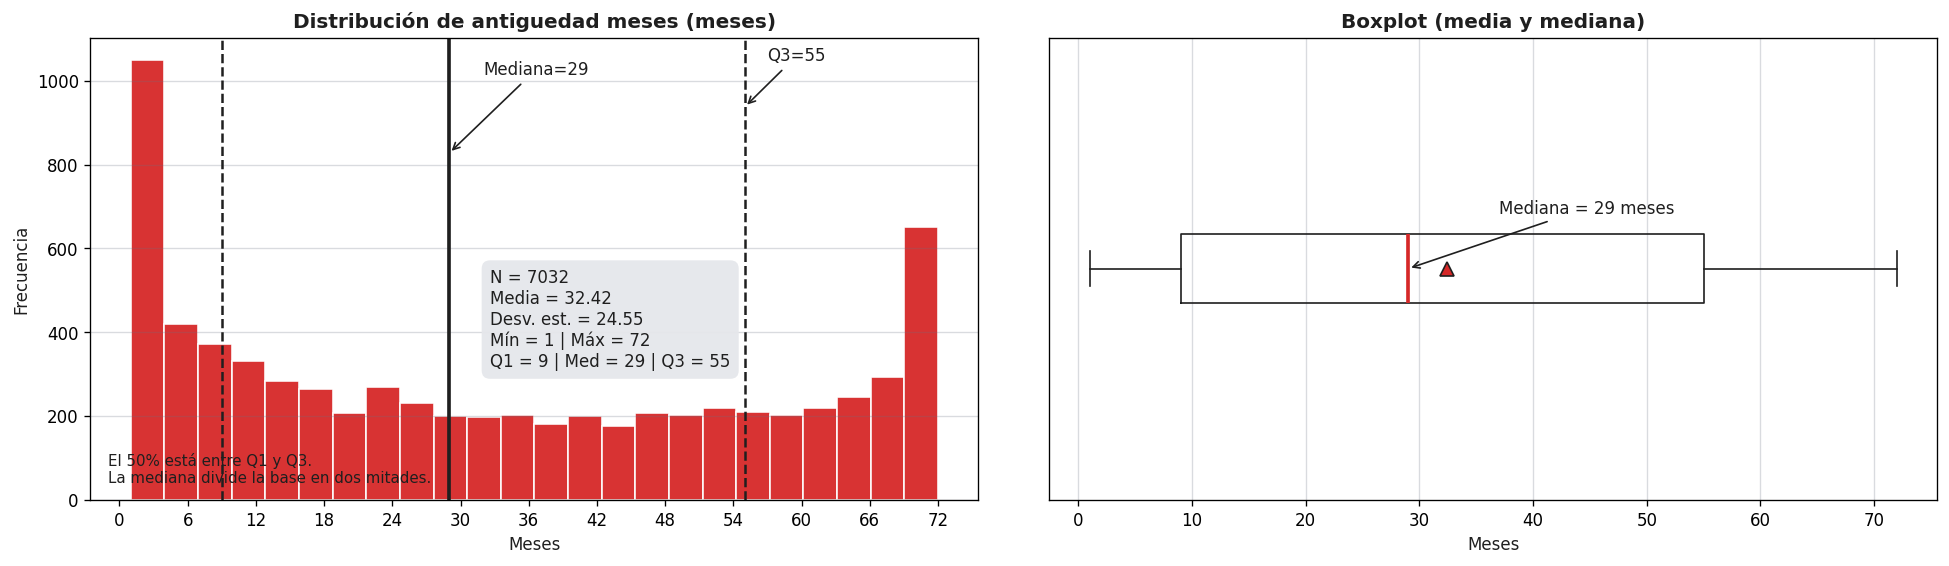

In [186]:
fig = plot_hist_box_meses(
    df_final,
    col="antiguedad_meses",
    bins=24,
    xticks=range(0, 73, 6),
)
fig.show()

####4.1.1.2. Resumen estadístico


*   Cantidad total: 7043
*   Media: 32.37
*   Desviacion estandar:24.56
*   Minimo: 0
*   Maximo: 72
*   Primer cuartil: 9
*   Segundo cuartil: 29
*   Tercer cuartil: 55
#### Interpretacion:
Interpretación
El rango de antigüedad va de 0 a 72 meses, lo que indica la presencia de clientes recién incorporados y clientes con una permanencia de hasta 6 años. La mediana de 29 meses sugiere que el cliente típico lleva alrededor de 2 años y 5 meses en la empresa.

El histograma sugiere que la distribución no es uniforme, observándose concentraciones en clientes con baja antigüedad y en clientes con antigüedad alta. La desviación estándar elevada (24.56) confirma una alta variabilidad en la antigüedad, coherente con la dispersión observada.


###4.1.2. Cargo mensual

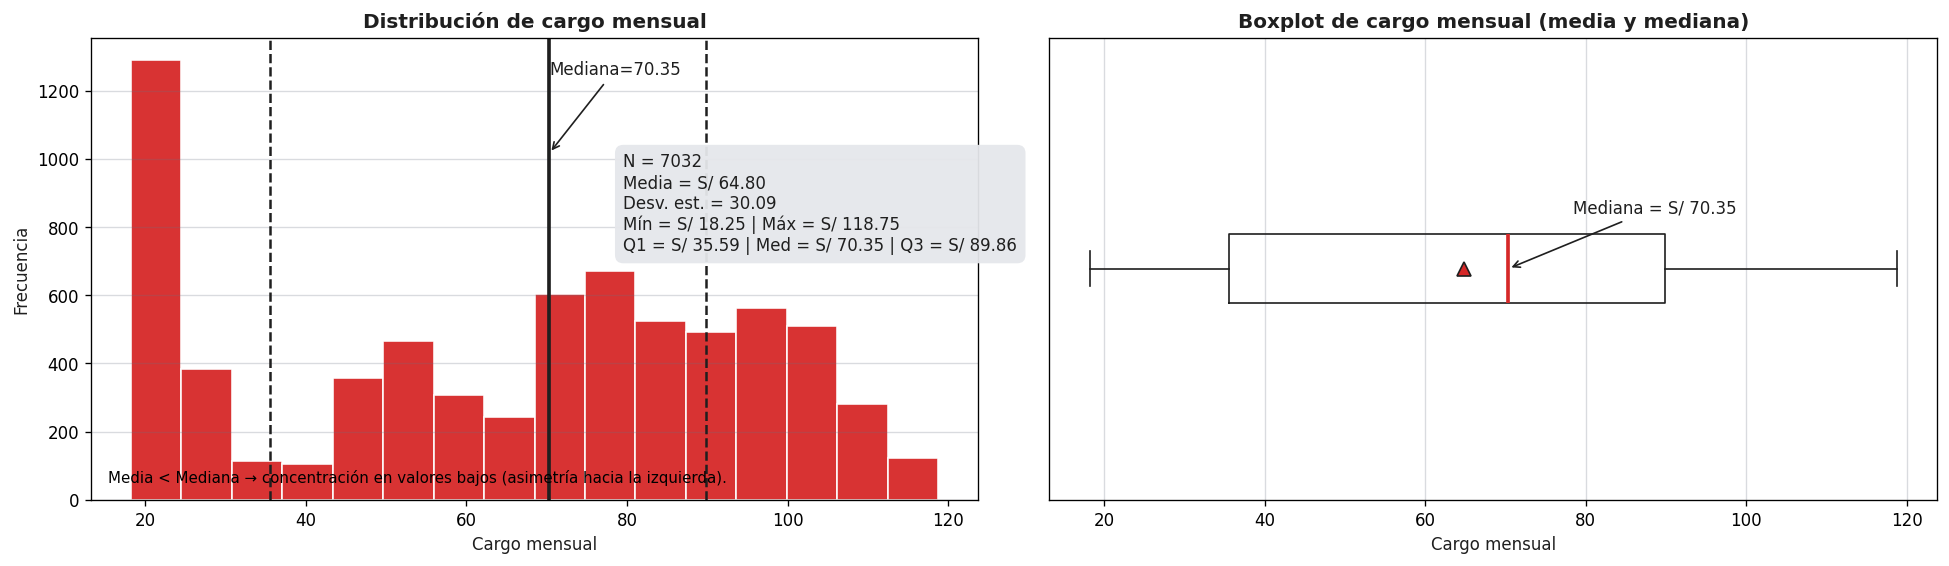

In [187]:
fig = plot_hist_box_cargo_mensual(
    df_final,
    col="cargo_mensual",
    bins=16,
    x_label="Cargo mensual",
    title_left="Distribución de cargo mensual",
    title_right="Boxplot de cargo mensual (media y mediana)",
    currency_prefix="S/ "
)
fig.show()


####4.1.2.1 Resumen estadístico


*   Cantidad total: 7043
*   Media: 64.76
*   Desviacion estandar:30.09
*   Minimo: 18.25
*   Maximo: 118.75
*   Primer cuartil: 35.5
*   Segundo cuartil: 70.35
*   Tercer cuartil: 89.85

#### Interpretacion:
El cargo mensual presenta un rango amplio (de S/ 18.25 a S/ 118.75), evidenciando la coexistencia de clientes con planes de bajo costo y clientes con mayor nivel de contratación. La mediana (S/ 70.35) indica que el cliente típico paga alrededor de S/ 70 mensuales.

La alta desviación estándar (30.09) refleja una cartera heterogénea. Además, el hecho de que la media (64.76) sea menor que la mediana (70.35) sugiere una mayor concentración de clientes en cargos bajos y la presencia de valores más altos que contribuyen a una distribución asimétrica.

###4.1.3. Cargo Total

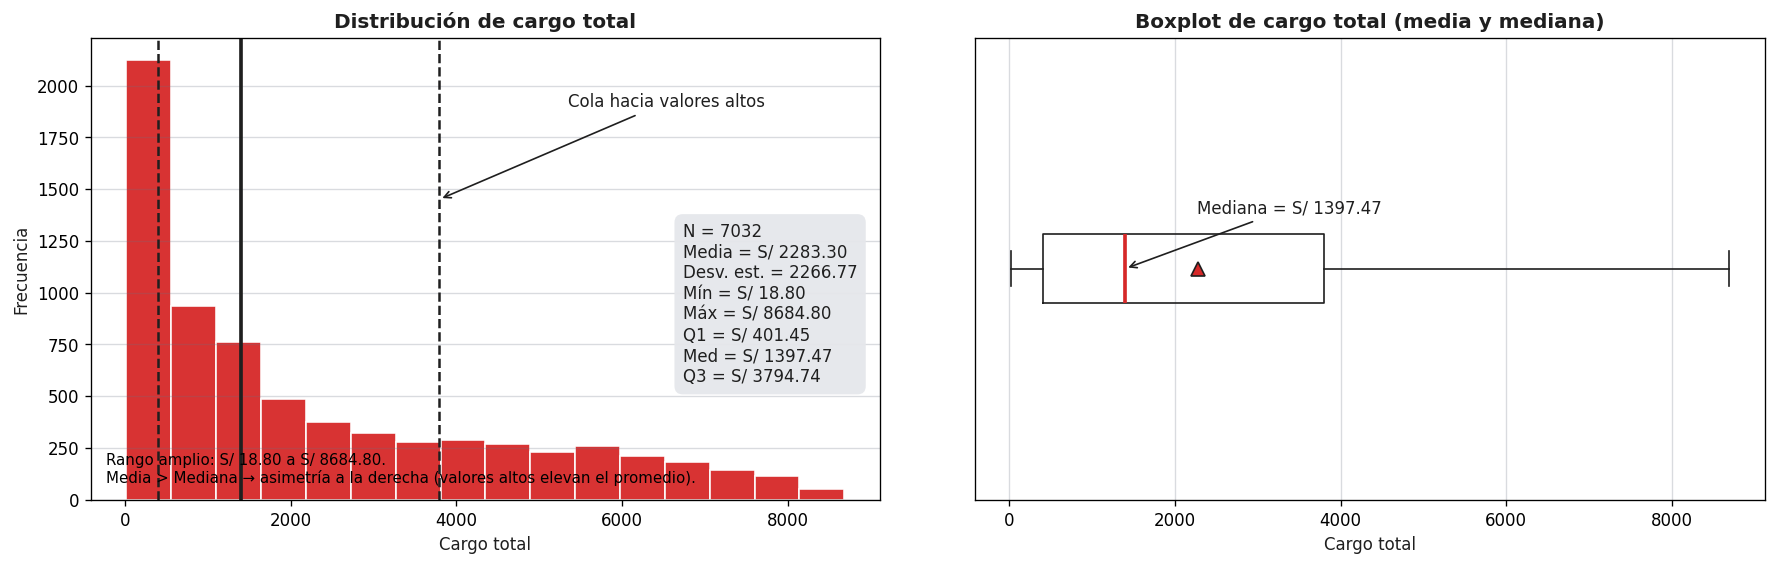

In [188]:
fig = plot_hist_box_cargo_total(df_final, col="cargo_total", bins=16)
fig.show()

####4.1.3.1 Resumen estadístico


*   Cantidad total: 7043
*   Media: 2283.30
*   Desviacion estandar:2266.77
*   Minimo: 18.80
*   Maximo: 8684.80
*   Primer cuartil: 401.45
*   Segundo cuartil: 1397.48
*   Tercer cuartil: 3794.74

#### Interpretacion:
El cargo total acumulado tiene un rango amplio, desde S/ 18.80 hasta aproximadamente S/ 8684.80, lo que indica clientes con bajo gasto acumulado (posiblemente con menor permanencia) y clientes con gasto histórico elevado (mayor permanencia y/o mayor contratación).

La desviación estándar (2266.77) confirma una alta variabilidad. Además, la distribución muestra asimetría a la derecha: la mayoría se concentra en montos bajos, mientras un grupo menor alcanza valores muy altos, formando una “cola” larga. Esto también se refleja en que la media (2283.30) es mayor que la mediana (1397.48).

##4.2. Variables cualitativas

###4.2.1. Churn

Aproximadamente una cuarta parte de los clientes (26.6%) abandonó el servicio. Este porcentaje es relevante dentro de la cartera total, por lo que se justifica analizar qué factores están asociados a la evasión.


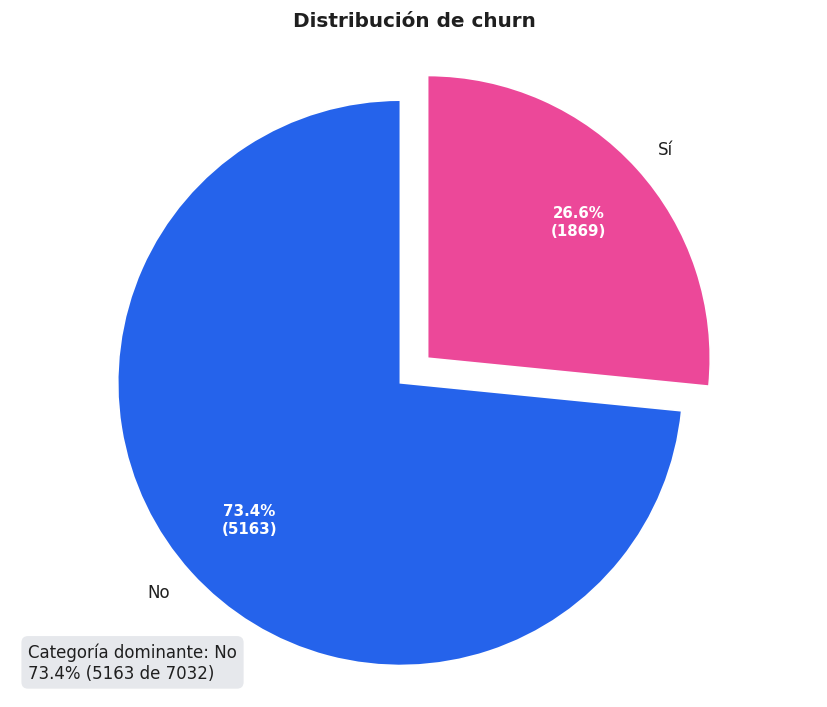

In [189]:
fig = pie_categoria_styled(df_final, "churn", title="Distribución de churn")
fig.show()

###4.2.2. Género

La distribución por género es casi equilibrada, indicando una cartera relativamente homogénea en este aspecto.

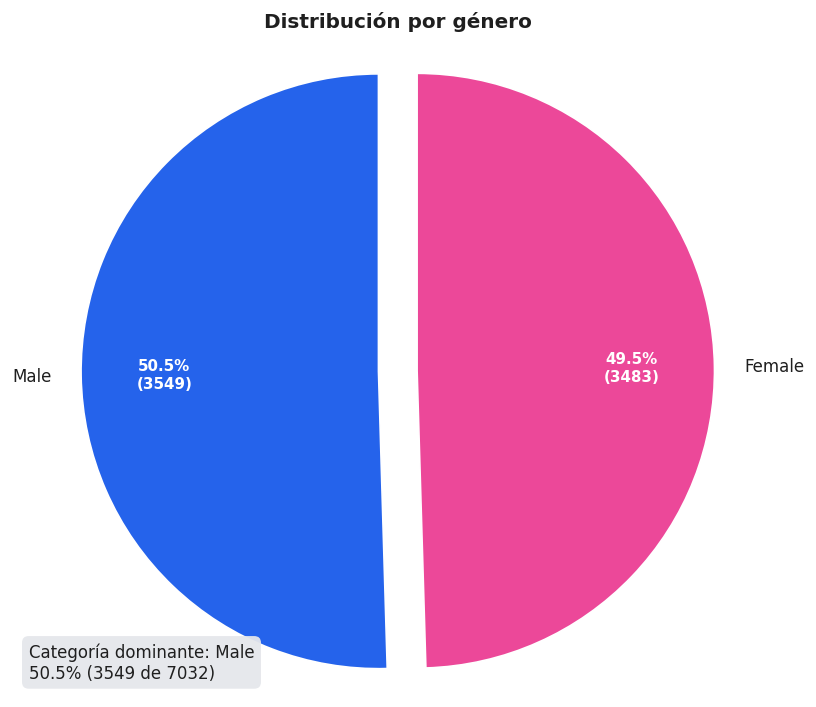

In [190]:
fig = pie_categoria_styled(df_final, "genero", title="Distribución por género")
fig.show()

###4.2.3. Tercera edad (mayor_65)

Los clientes mayores de 65 años representan aproximadamente 1142 (16.2%). Es un segmento importante y se evaluará su relación con churn en el análisis segmentado.

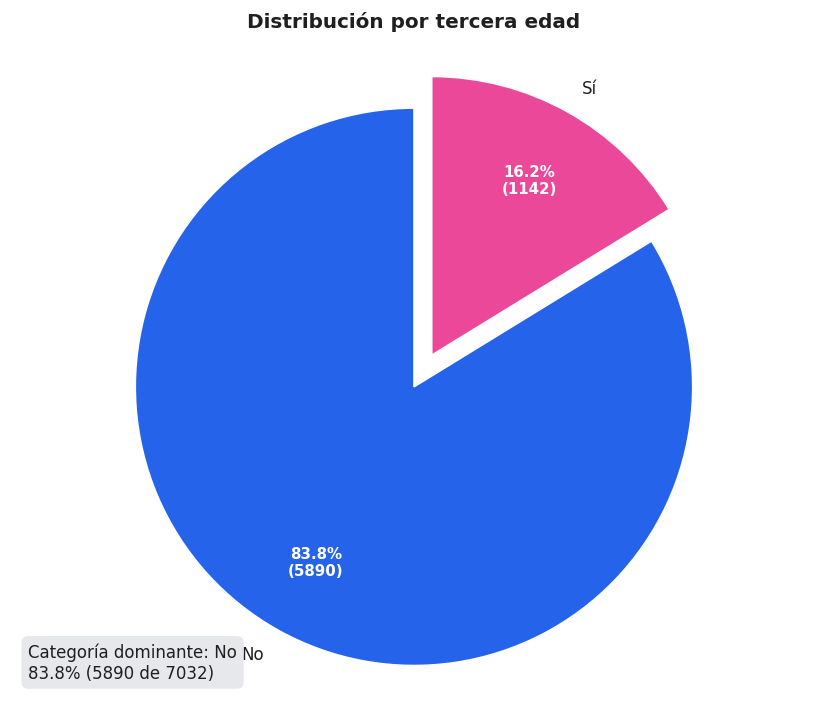

In [191]:
fig = pie_categoria_styled(df_final, "mayor_65", title="Distribución por tercera edad")
fig.show()

###4.2.4. Tiene pareja (tiene_pareja)

La distribución es relativamente equilibrada entre clientes con y sin pareja. Posteriormente se analizará su asociación con churn.


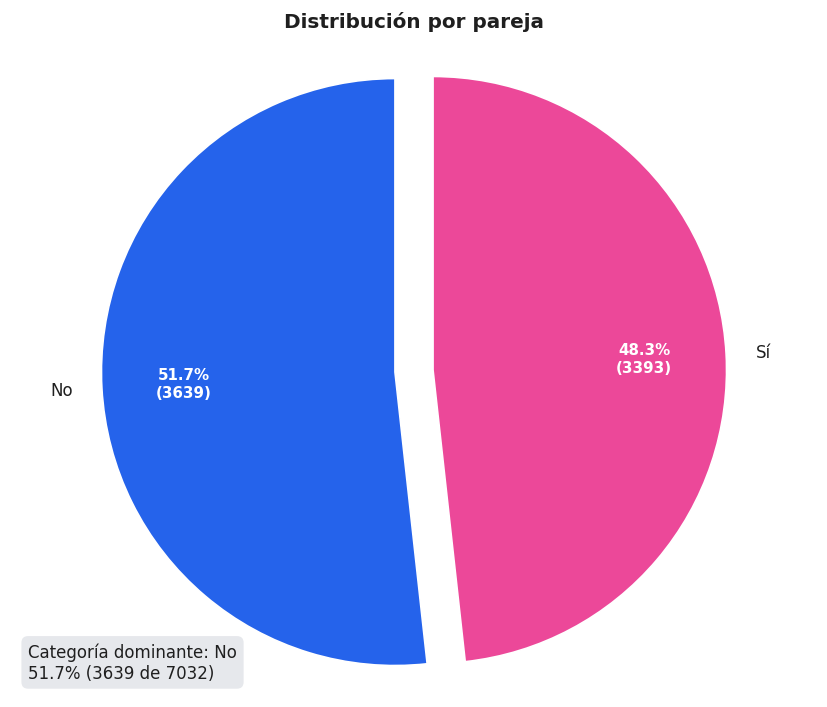

In [192]:
fig = pie_categoria_styled(df_final, "tiene_pareja", title="Distribución por pareja")
fig.show()

###4.2.5. Dependientes (tiene_dependientes)

Aproximadamente 30% de los clientes reporta tener dependientes. Se evaluará su relación con churn, ya que puede reflejar diferencias en estabilidad o necesidades.

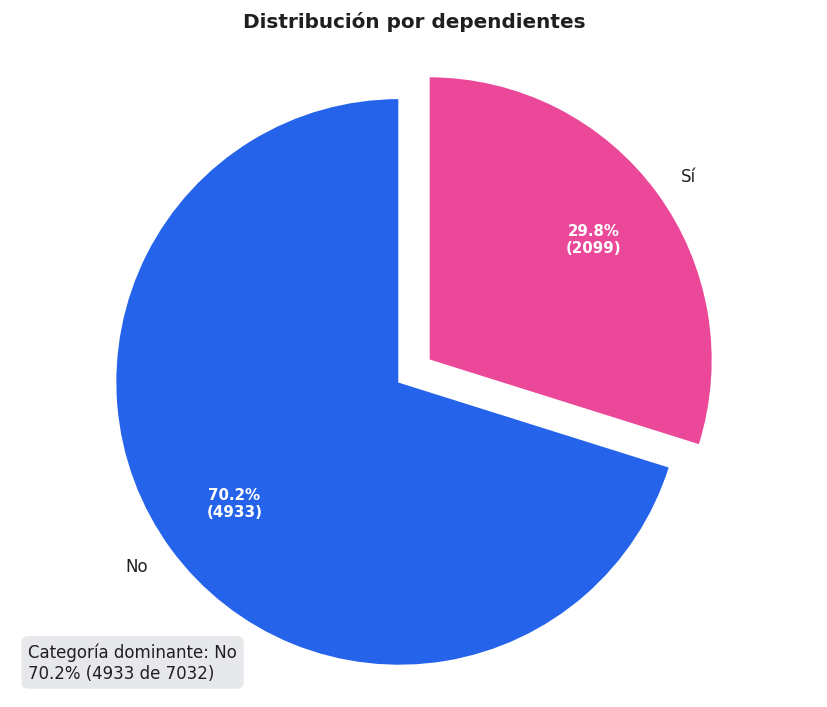

In [193]:
fig = pie_categoria_styled(df_final, "tiene_dependientes", title="Distribución por dependientes")
fig.show()

###4.2.6. Servicio telefónico (servicio_telefonico)

Alrededor del 90% cuenta con servicio de telefonía, lo que muestra una alta adopción de este servicio en la base.


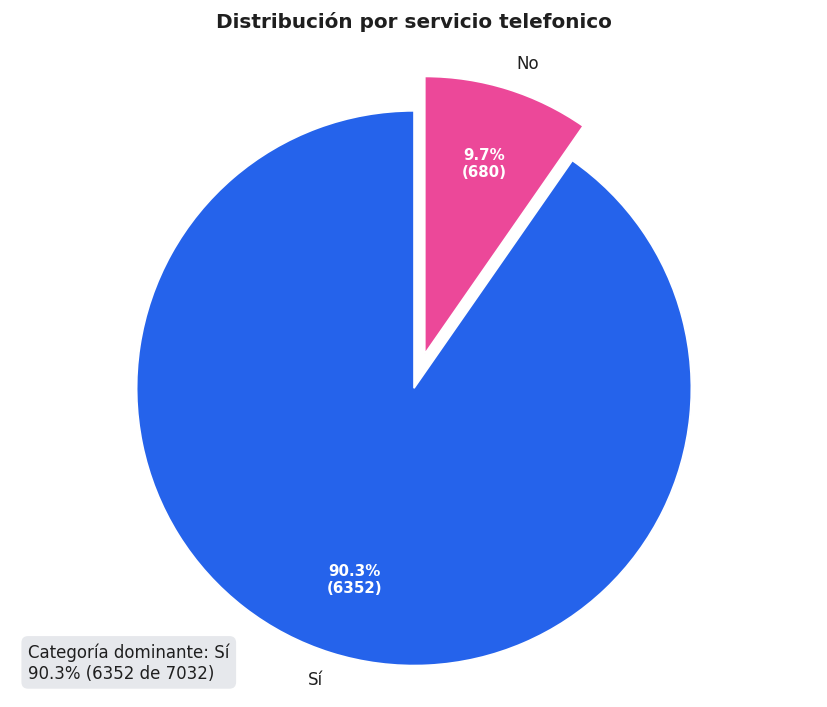

In [194]:
fig = pie_categoria_styled(df_final, "servicio_telefonico", title="Distribución por servicio telefonico")
fig.show()

###4.2.7. Servicio de internet (servicio_internet)

El 21.6% no cuenta con servicio de internet. Entre quienes sí lo tienen, predomina fibra óptica (44%) y DSL (34.4%). Posteriormente se analizará si el tipo de servicio se relaciona con churn.

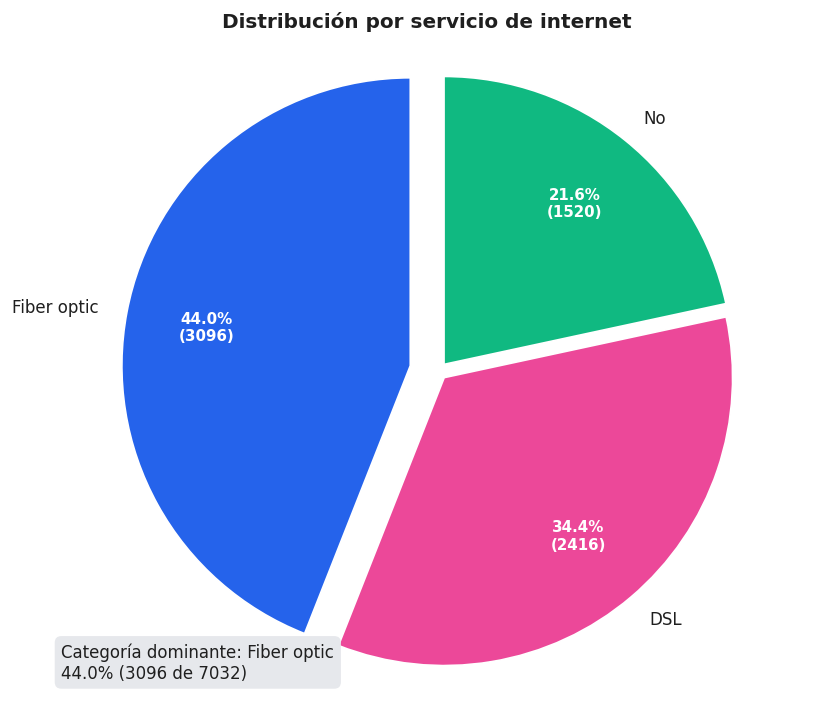

In [195]:
fig = pie_categoria_styled(df_final, "servicio_internet", title="Distribución por servicio de internet")
fig.show()

###4.2.8. Tipo de contrato (tipo_contrato)

Predomina el contrato mes a mes (55%), seguido por 2 años (24%) y 1 año (20%). Esto sugiere preferencia por modalidades más flexibles (mes a mes).


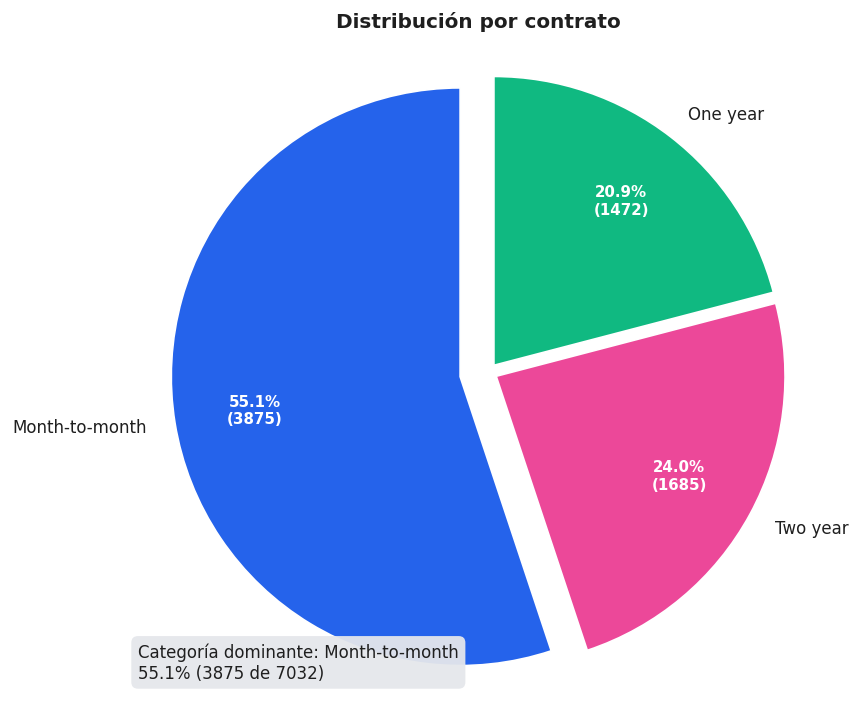

In [196]:
fig = pie_categoria_styled(df_final, "tipo_contrato", title="Distribución por contrato")
fig.show()


###4.2.9. Factura digital (factura_digital)

Casi el 60% prefiere facturación digital frente a física. Se evaluará su relación con churn.

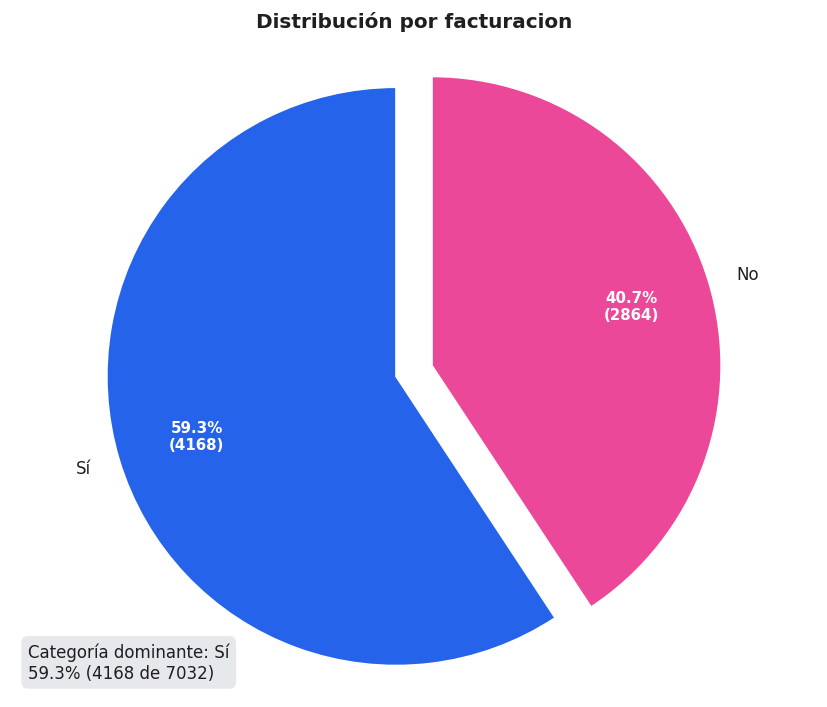

In [197]:
fig = pie_categoria_styled(df_final, "factura_digital", title="Distribución por facturacion")
fig.show()

###4.2.10. Método de pago (metodo_pago)

Se observan cuatro métodos: cheque electrónico (33.6%), cheque por correo (22.8%), transferencia bancaria automática (21.9%) y tarjeta de crédito automática (21.6%).

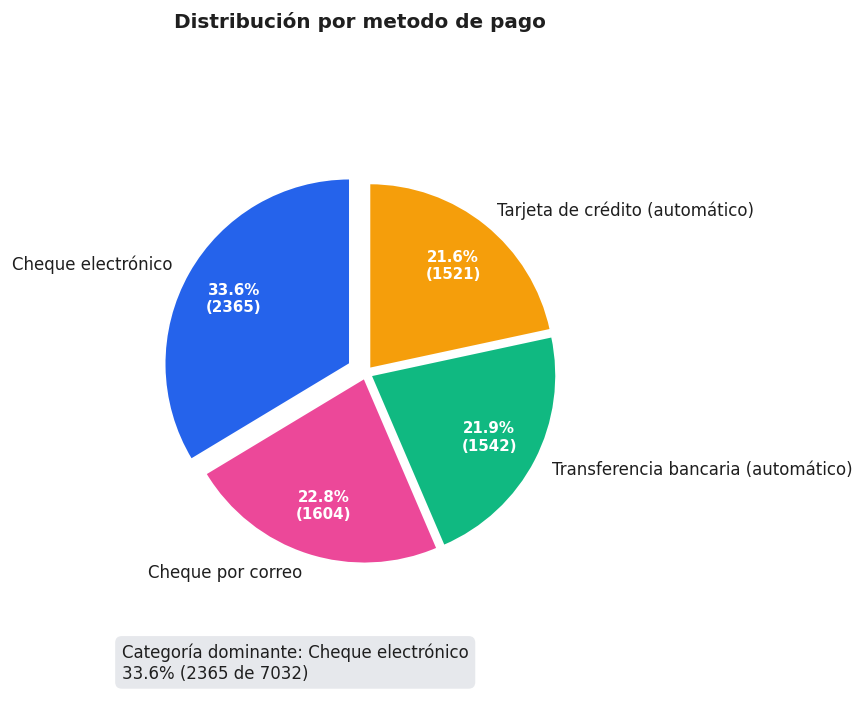

In [198]:
fig = pie_categoria_styled(df_final, "metodo_pago", title="Distribución por metodo de pago")
fig.show()

#5. Distribucion del Churn

Ahora analizaremos la distribucion del churn por variables categoricas


*   Genero
*   Tercera edad
*   Tiene pareja
*   Dependientes
*   Tipo de Contrato
*   Factura digital
*   Metodo de pago




##5.1. Genero

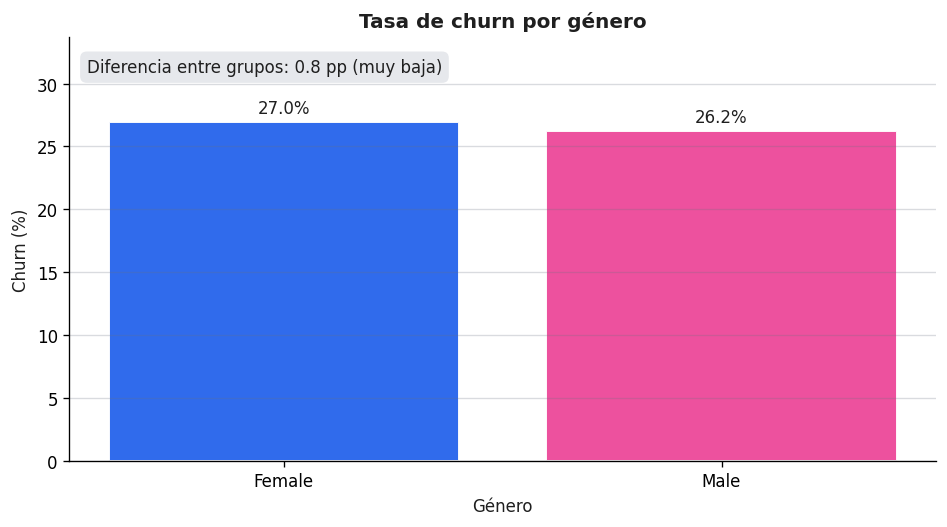

In [199]:
sty, fig = genero_vs_churn_styled(df_final)
sty
fig.show()


In [200]:
sty

,No churn (0),Churn (1),No churn %,Churn %
genero,,,,
Female,2544,939,73.04,26.96
Male,2619,930,73.80,26.20


Al segmentar por género, la tasa de churn es prácticamente la misma en ambos grupos (diferencia menor a 1 punto porcentual). Esto sugiere que el género no es un factor diferenciador relevante para explicar el abandono en esta base, por lo que conviene priorizar variables con mayores contrastes (como tipo de contrato, método de pago o edad).

##5.2. Tercera edad

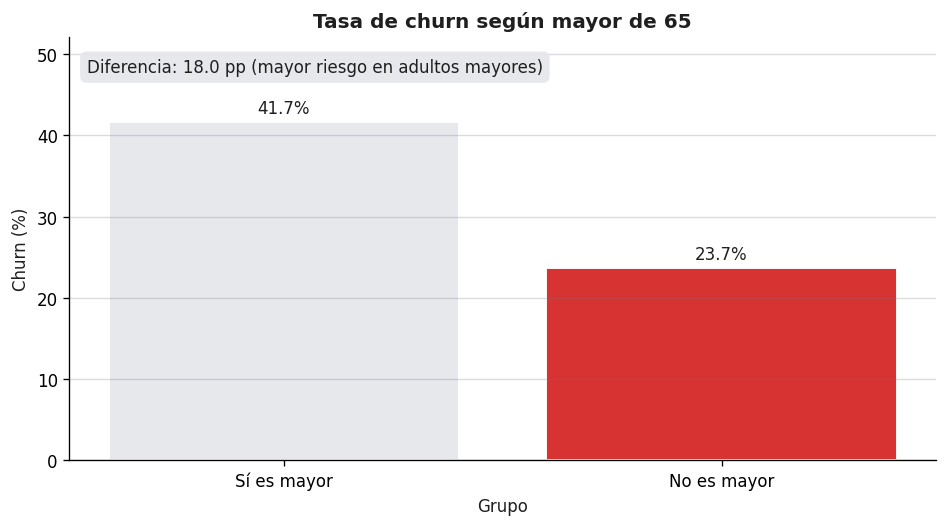

In [201]:
sty, fig = mayor65_vs_churn_styled(df_final)
fig.show()

In [202]:
sty

,No churn (0),Churn (1),No churn %,Churn %
No es mayor,4497,1393,76.35,23.65
Sí es mayor,666,476,58.32,41.68


Al analizar el churn por grupo etario, se observa una diferencia marcada: los adultos mayores (≥65 años) presentan una tasa de abandono de 41.68%, considerablemente superior a la de los clientes que no son mayores (23.65%). Esto indica que, aunque el grupo de adultos mayores es más pequeño en cantidad, su riesgo de evasión es mucho más alto.

Este patrón sugiere que la edad podría estar asociada a factores como mayor sensibilidad al precio, dificultades con ciertos procesos (pago, soporte o facturación digital), o necesidades de atención más especializada. Por ello, el segmento de adultos mayores debería considerarse prioritario en estrategias de retención.

##5.3.Personas con pareja

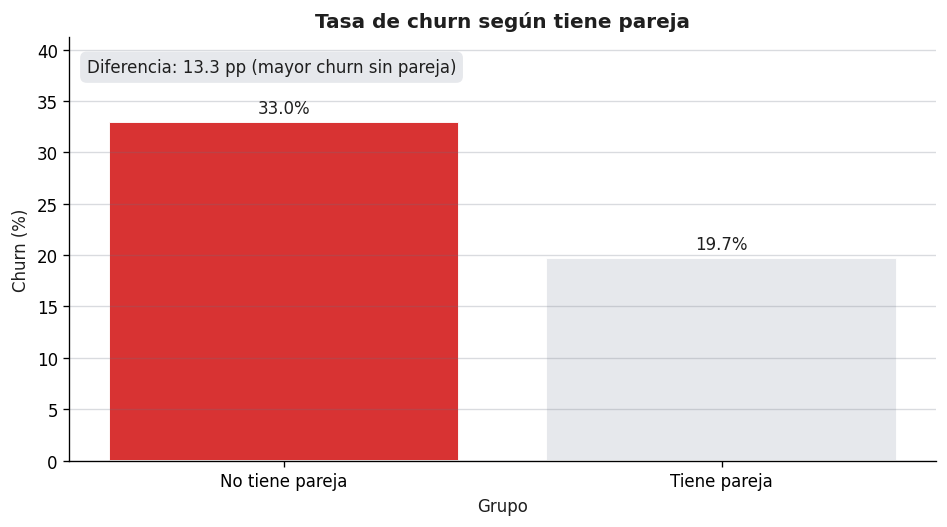

In [203]:
sty, fig = pareja_vs_churn_styled(df_final)

fig.show()

In [204]:
sty

,No churn (0),Churn (1),No churn %,Churn %
No tiene pareja,2439,1200,67.02,32.98
Tiene pareja,2724,669,80.28,19.72


Se observa una diferencia clara en la tasa de churn según el estado de pareja: los clientes sin pareja presentan una tasa de abandono de 32.98%, mientras que los clientes con pareja presentan 19.72%. Esto sugiere que no tener pareja está asociado a un mayor riesgo de cancelación.

Una posible explicación es que los hogares con pareja tienden a tener **mayor necesidad de continuidad del servicio** (uso compartido del internet/telefonía) y, por lo tanto, **mayor estabilidad**. En cambio, clientes sin pareja podrían ser más flexibles para cambiar de proveedor o ajustar gastos.

##5.4. Dependientes

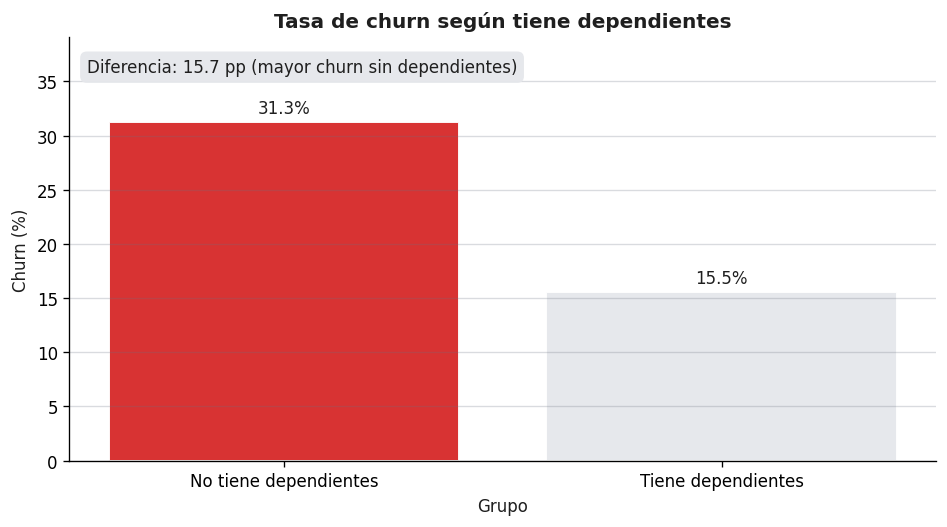

In [205]:
sty, fig = dependientes_vs_churn_styled(df_final)

fig.show()

In [206]:
sty

,No churn (0),Churn (1),No churn %,Churn %
No tiene dependientes,3390,1543,68.72,31.28
Tiene dependientes,1773,326,84.47,15.53


Los clientes sin dependientes presentan una tasa de churn de 31.28%, mientras que los clientes con dependientes muestran una tasa mucho menor de 15.53%. Esto indica que tener dependientes está asociado con una mayor retención.

Este comportamiento es coherente con la idea de que, cuando el servicio es utilizado por más personas en el hogar (familia/dependientes), aumenta su **“necesidad”** y disminuye la probabilidad de cancelación.

##5.5. Tipo de contrato

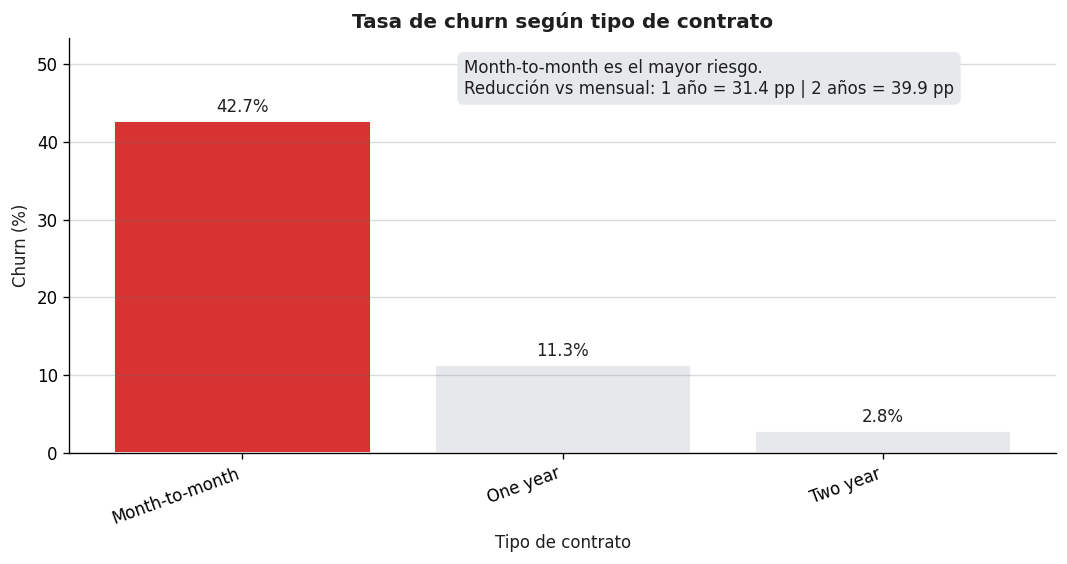

In [207]:
sty, fig = contrato_vs_churn_styled(df_final)

fig.show()

In [208]:
sty

,No churn (0),Churn (1),No churn %,Churn %
tipo_contrato,,,,
Month-to-month,2220,1655,57.29,42.71
One year,1306,166,88.72,11.28
Two year,1637,48,97.15,2.85


La diferencia en churn por tipo de contrato es muy marcada. El contrato **Month-to-month** presenta la mayor tasa de churn (42.71%), mientras que los contratos de One year (11.28%) y Two year (2.85%) muestran tasas significativamente menores.

Esto sugiere que el nivel de compromiso contractual es un factor fuertemente asociado a la retención: cuando el cliente está en modalidad mensual, tiene mayor facilidad para cancelar o cambiar de proveedor, mientras que los contratos largos reducen esa probabilidad. Además, dado que el contrato mensual es el más frecuente en la base, se convierte en el segmento prioritario para estrategias de retención (incentivos de migración a contrato anual, beneficios por permanencia, ofertas de renovación, etc.).

##5.6. Factura digital

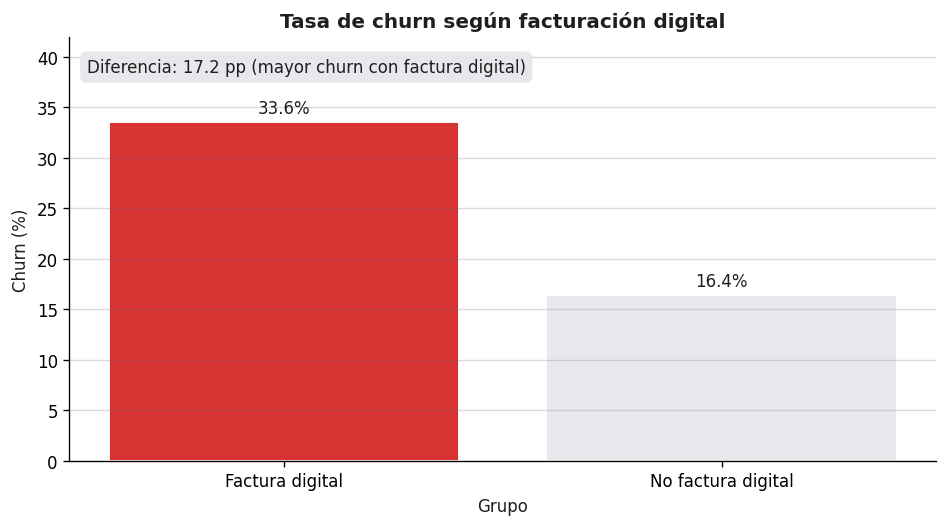

In [209]:
sty, fig = factura_digital_vs_churn_styled(df_final)

fig.show()

In [210]:
sty

,No churn (0),Churn (1),No churn %,Churn %
No factura digital,2395,469,83.62,16.38
Factura digital,2768,1400,66.41,33.59


Los clientes con facturación digital presentan una tasa de churn significativamente mayor (33.59%) en comparación con quienes no la usan (16.38%). Esto sugiere que la preferencia por canales digitales está asociada a una mayor probabilidad de cancelación.

Una hipótesis razonable es que los clientes más digitales suelen tener mayor autonomía para gestionar cambios o cancelaciones en línea, o que “factura digital” esté correlacionada con otros factores de riesgo, como contrato mes a mes o ciertos métodos de pago.

##5.7. Metodo de pago

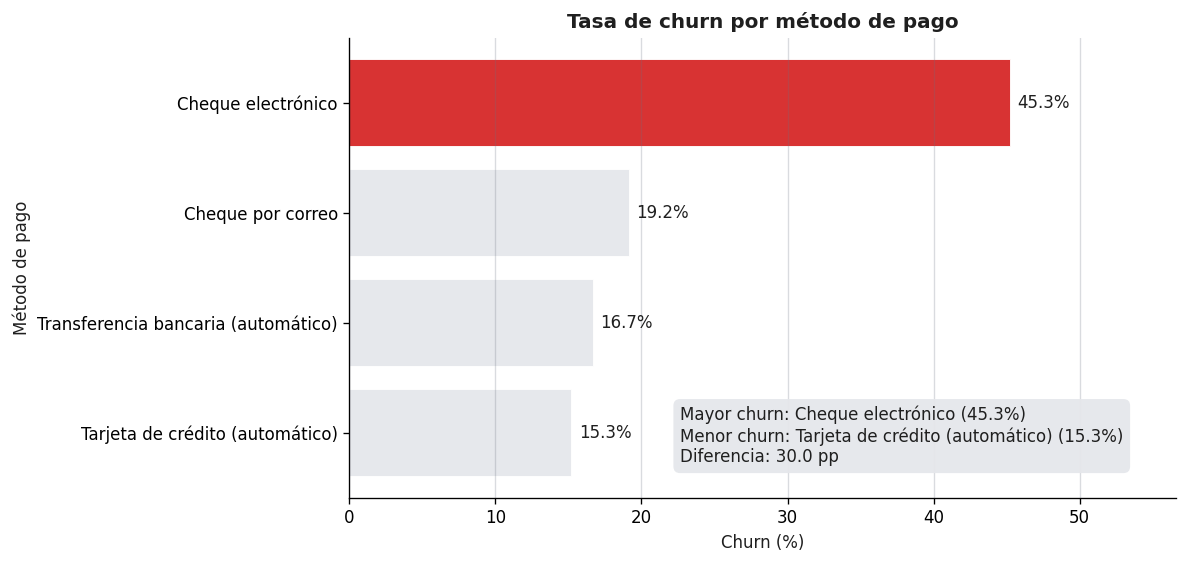

In [211]:
sty, fig = metodo_pago_vs_churn_styled(df_final)

fig.show()

In [212]:
sty

,No churn (0),Churn (1),No churn %,Churn %
metodo_pago,,,,
Cheque electrónico,1294,1071,54.71,45.29
Cheque por correo,1296,308,80.80,19.20
Tarjeta de crédito (automático),1289,232,84.75,15.25
Transferencia bancaria (automático),1284,258,83.27,16.73


El método de pago con mayor tasa de churn es Cheque electrónico (45.29%), muy por encima del resto: Cheque por correo (19.20%), Transferencia bancaria automática (16.73%) y Tarjeta de crédito automática (15.25%). Esto sugiere que el método de pago está fuertemente asociado al riesgo de abandono.

Una explicación plausible es que el cheque electrónico suele ser no automático, lo que implica más esfuerzo mensual y mayor probabilidad de interrupciones o fricción en el pago. Además, es posible que este método esté concentrado en clientes con contrato mes a mes, lo cual podría amplificar el churn observado. Por ello, una estrategia razonable sería incentivar la migración a pagos automáticos (bono, descuento, beneficios por autopago) y validar la interacción con tipo_contrato mediante una tabla cruzada

#6. Distribucion del churn por variables Numericas

Analizaremos la distribucion de la evasion de acuerdo a las siguientes variables
*   Meses de antiguedad
*   Cargo mensual
*   Cargo total
*   Cuenta diaria




In [213]:
num_cols = ["antiguedad_meses", "cargo_mensual", "cargo_total", "Cuentas_Diarias"]
mini, sty = mini_tabla_numericas_por_churn_styled(df_final, num_cols)
sty

##6.1. Meses de antigüedad

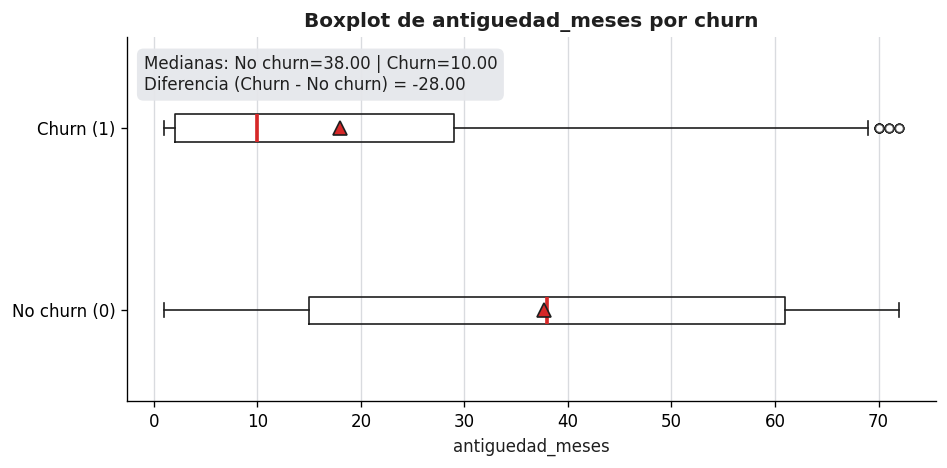

In [214]:
fig = boxplot_por_churn_styled(df_final, "antiguedad_meses")
fig.show()

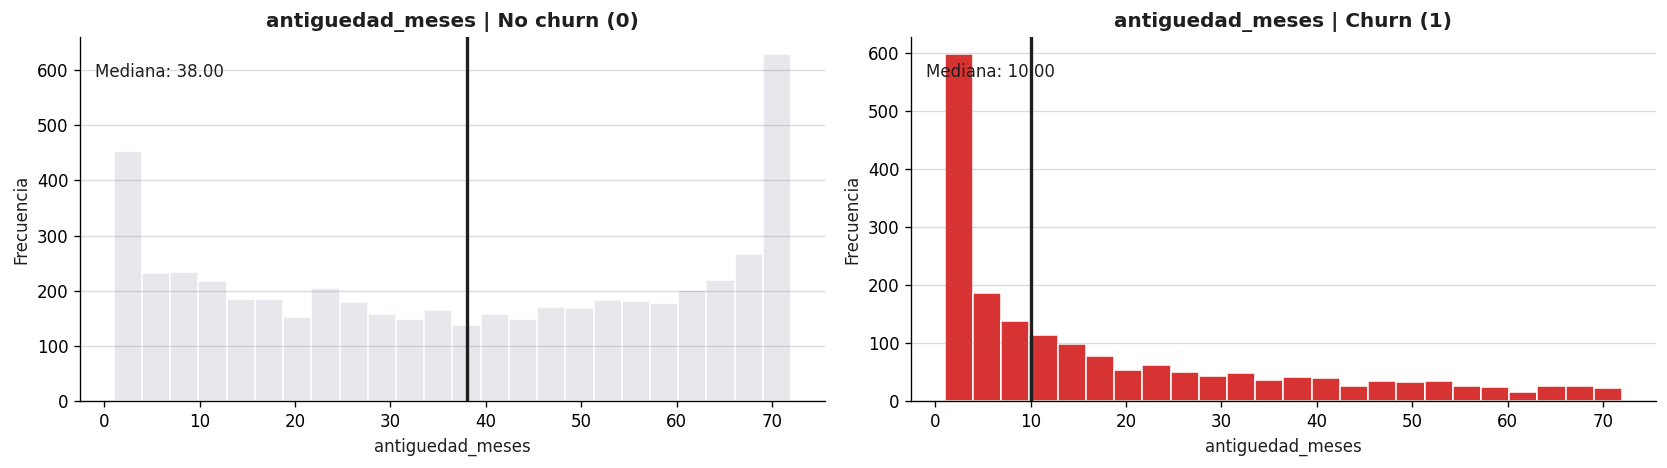

In [215]:
fig = hist_por_churn_styled(df_final, "antiguedad_meses", bins=24)
fig.show()

El boxplot muestra una diferencia clara entre ambos grupos: los clientes que hacen churn (1) tienen, en general, menor antigüedad que los que se quedan. La mediana de los que se retiran está alrededor de *~10 meses*, y la caja (50% central) se concentra en valores bajos (aprox. entre 0 y 30 meses), lo que sugiere que gran parte del **churn ocurre en etapas tempranas** de la relación con la empresa.

En el histograma de churn se observa una alta concentración de clientes que se retiran en los primeros meses (especialmente alrededor de 1 a 4 meses) y luego una caída progresiva conforme aumenta la antigüedad. En cambio, los clientes que no abandonan (0) presentan una antigüedad típicamente mayor: su mediana se ubica cerca de *~40 meses*, y el 50% central se distribuye aproximadamente entre 15 y 60 meses, evidenciando **mayor estabilidad en clientes con más tiempo**.

##6.2.Cargo mensual

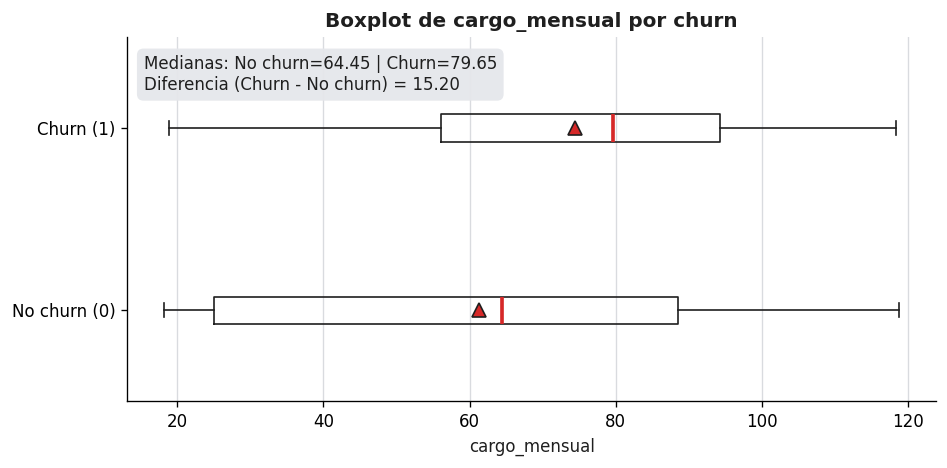

In [216]:
fig = boxplot_por_churn_styled(df_final, "cargo_mensual")
fig.show()

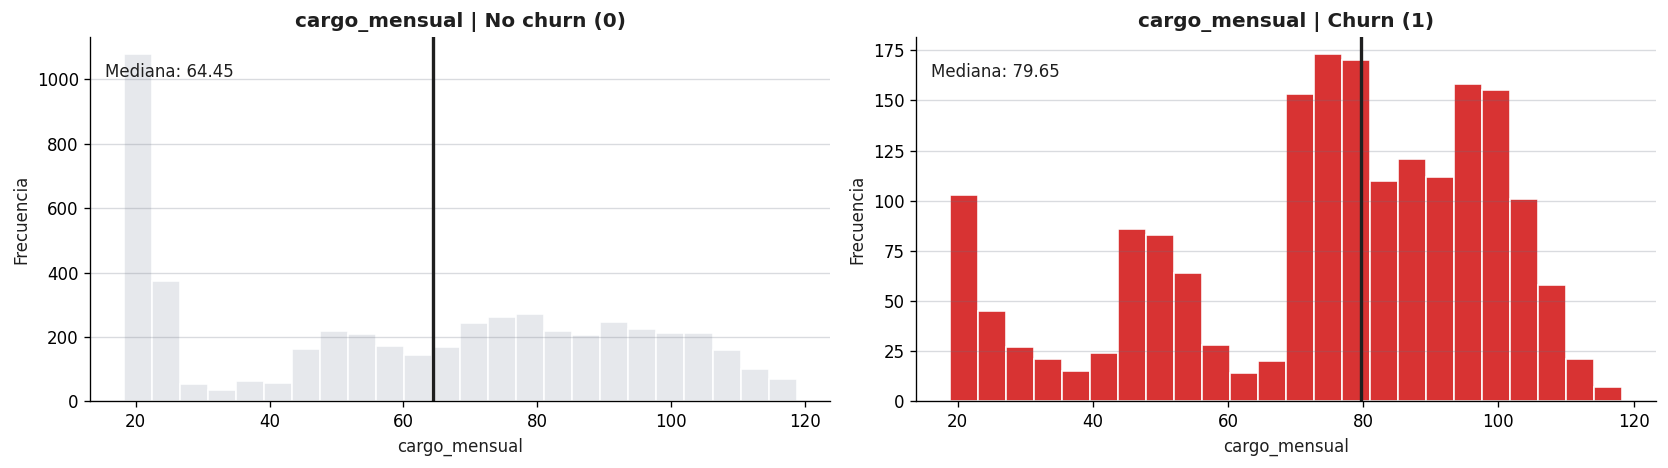

In [217]:
fig = hist_por_churn_styled(df_final, "cargo_mensual", bins=24)
fig.show()


El boxplot sugiere que los clientes que se retiran (churn=1) tienden a tener **un cargo mensual más alto**. La mediana para churn se observa alrededor de *~80 soles*, y el 50% central se distribuye aproximadamente entre *~57* y *~95* soles. En comparación, los clientes que permanecen (churn=0) tienen una mediana menor, cercana a *~64* soles, con un 50% central aproximadamente entre *~27* y ~88 soles.

En el histograma se aprecia que en no churn existe una gran acumulación de clientes con cargos cercanos a *~20* soles (planes más básicos), mientras que en churn la mayor parte de los clientes se concentra en rangos más altos, aproximadamente entre 70 y 110 soles. Esto sugiere que **cargos mensuales elevados** podrían estar asociados a mayor propensión a cancelar (aún sin concluir causalidad).

##6.3.Cargo total

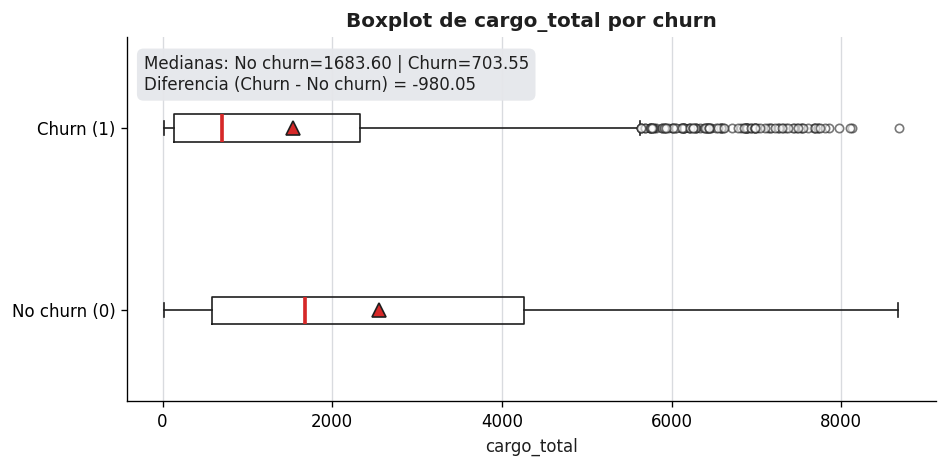

In [218]:
fig = boxplot_por_churn_styled(df_final, "cargo_total")
fig.show()

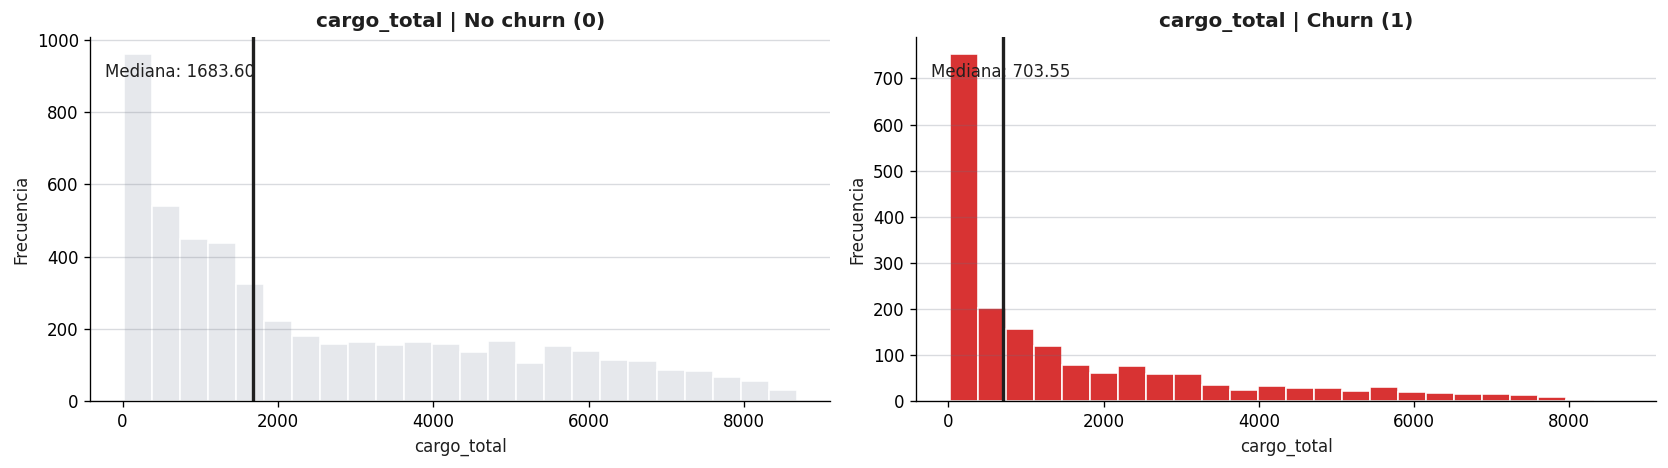

In [219]:
fig = hist_por_churn_styled(df_final, "cargo_total", bins=24)
fig.show()


El boxplot indica que los clientes que se retiran tienen un **cargo total acumulado relativamente menor**. La mediana para churn se ubica aproximadamente alrededor de *~700* soles, y el 50% central se concentra en valores relativamente bajos (aprox. entre *~100 y ~2100 *soles). Esto es consistente con la idea de que muchos clientes que se van lo hacen con poca antigüedad, por lo que no llegan a acumular grandes montos totales.

El histograma refuerza esta interpretación: en churn (1) hay una fuerte **concentración en montos bajos** (por ejemplo, alrededor de unos cientos de soles), lo que sugiere que gran parte de las bajas corresponden a clientes que no han permanecido suficiente tiempo como para generar un cargo total elevado. En no churn (0) la distribución se extiende más hacia valores altos, lo cual es esperable porque **los clientes con mayor permanencia acumulan más gasto total**.

##6.4.Cuentas Diarias



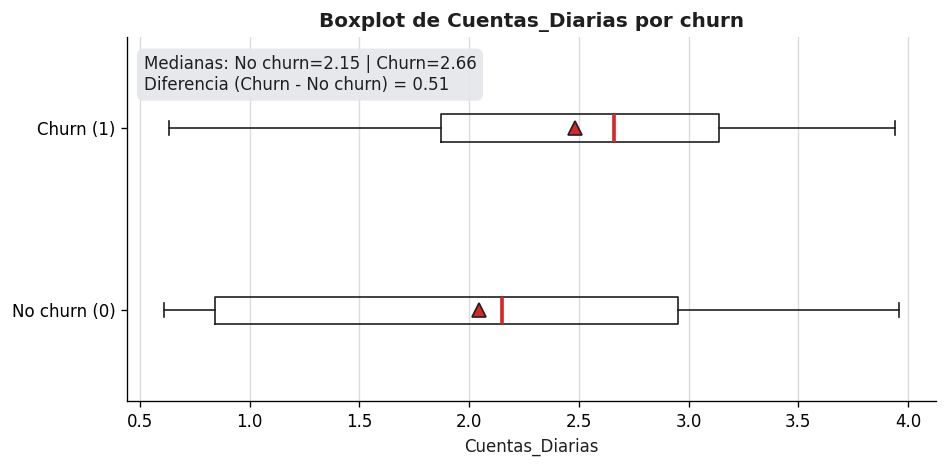

In [220]:
fig = boxplot_por_churn_styled(df_final, "Cuentas_Diarias")
fig.show()

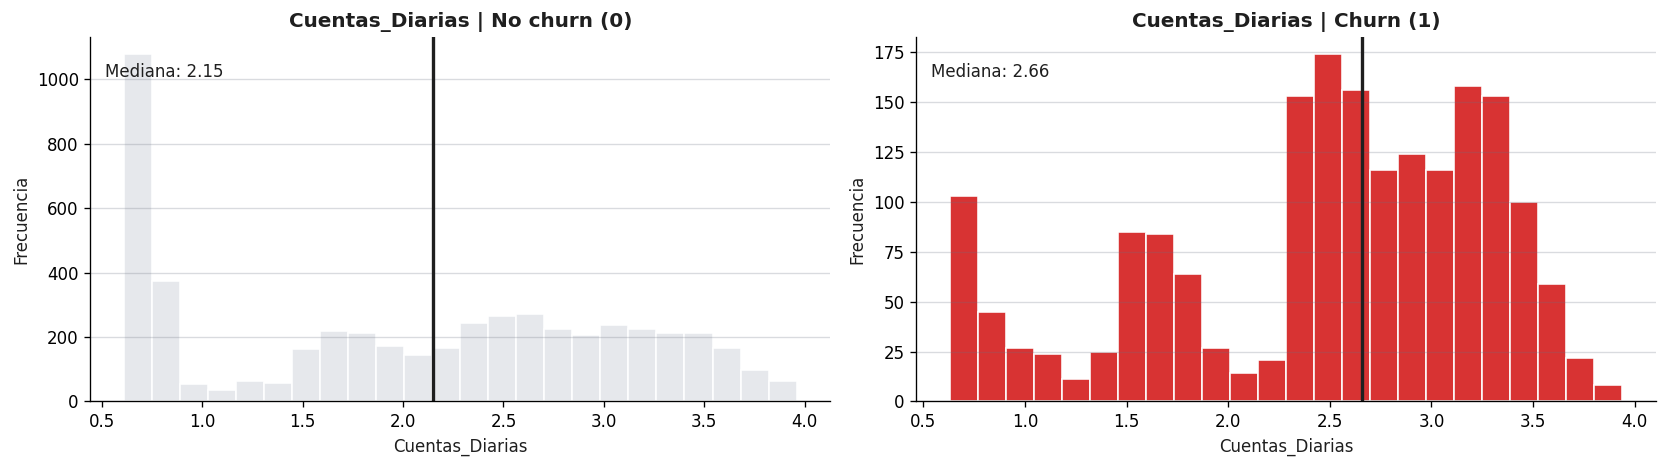

In [221]:
fig = hist_por_churn_styled(df_final, "Cuentas_Diarias", bins=24)
fig.show()

Cuentas Diarias es básicamente una transformación directa de cargo_mensual (cargo_mensual/30), por lo que su comportamiento es muy similar. El boxplot muestra que los clientes con churn tienen un valor diario típico más alto (mediana alrededor de *~2.6–2.7*), mientras que los clientes que permanecen presentan una mediana menor (alrededor de* ~2.1–2.2*). En el histograma, los churn tienden a concentrarse en valores diarios más altos, lo cual refleja nuevamente que los clientes que se retiran suelen tener planes/consumos mensuales más costosos.

#7. EXTRA

##7.1. Correlación del churn con las variables

Correlación entre churn y variables numéricas (*Pearson*)
Como análisis adicional, se calculó la correlación de Pearson usando corr(), que mide la relación lineal entre dos variables. Su valor va de -1 a 1:

*    Cerca de 1: relación positiva (cuando X sube, Y tiende a subir).

*    Cerca de -1: relación negativa (cuando X sube, Y tiende a bajar).

*    Cerca de 0: no hay relación lineal clara (aunque podría existir una relación no lineal).

Importante: la correlación no implica causalidad; solo indica asociación lineal.


In [222]:
corr_churn, sty = corr_churn_styled(df_final, num_cols)
sty

,Correlación
Variable,
churn,+1.000
Cuentas_Diarias,+0.193
cargo_mensual,+0.193
cargo_total,-0.199
antiguedad_meses,-0.354


Resultados (correlación con churn):

*    Cuentas_Diarias y cargo_mensual tienen correlaciones muy similares (≈ +0.193). Esto sugiere que, en promedio, a mayor gasto mensual/diario, mayor probabilidad de churn, posiblemente porque los clientes con planes más costosos son más sensibles al precio o al valor percibido.

*    cargo_total tiene correlación negativa (≈ -0.199), lo que indica que los clientes con mayor gasto acumulado tienden a abandonar menos. Esto es coherente con el hecho de que el gasto total acumulado suele aumentar con el tiempo de permanencia.

*    La relación más fuerte es antiguedad_meses (≈ -0.354), indicando que a mayor antigüedad, menor churn. Este hallazgo coincide con lo observado en los boxplots e histogramas: una parte importante del churn ocurre en los primeros meses.

Se ve de mejor manera utilizando una matriz de correlacion

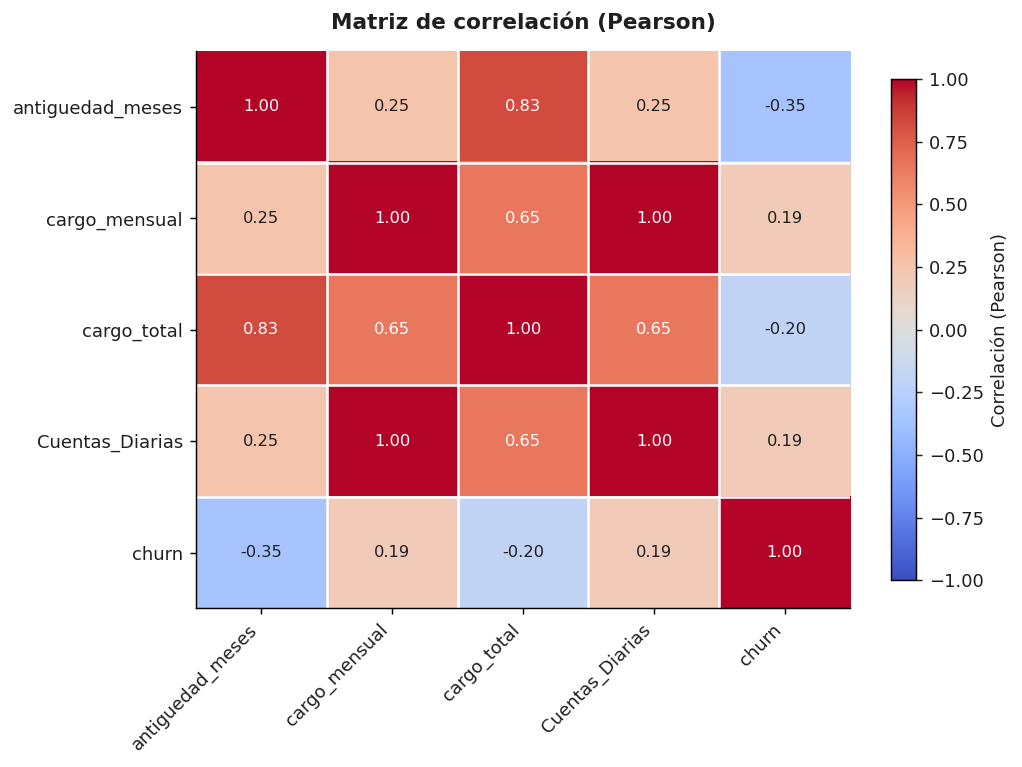

In [223]:
cols = num_cols + ["churn"]
fig = matriz_correlacion_styled(df_final, cols)
fig.show()


##7.2. Análisis por cantidad de servicios contratados

Como sabemos, existen servicios adicionales asociados a la telefonía y al internet. Agregaremos una nueva columna llamada **`num_servicios`**, que contendrá la suma total de servicios contratados por cada cliente. Con esta variable evaluaremos si la cantidad de servicios tiene alguna relación con el **churn**.


In [224]:
# 1) telefono (ya está en 0/1)
df_final["telefono_bin"] = df_final["servicio_telefonico"]

# 2) multiples líneas (solo Yes cuenta)
df_final["multiples_lineas_bin"] = (df_final["multiples_lineas"] == "Yes").astype(int)

# 3) internet (si no es "No", cuenta)
df_final["internet_bin"] = (df_final["servicio_internet"] != "No").astype(int)

# 4) add-ons de internet (solo Yes cuenta)
addons = ["seguridad_online","backup_online","proteccion_dispositivo",
          "soporte_tecnico","streaming_tv","streaming_peliculas"]

for c in addons:
    df_final[c + "_bin"] = (df_final[c] == "Yes").astype(int)

# 5) número total de servicios contratados
service_bins = ["telefono_bin","multiples_lineas_bin","internet_bin"] + [c + "_bin" for c in addons]
df_final["num_servicios"] = df_final[service_bins].sum(axis=1)


Despues de hacer la transformacion agruparemos  por numero de servicios y calcularemos la media del churn ya que siendo estos valores solo 0 o 1 saldra el promedio de churn por servicio

In [225]:
churn_por_servicios, sty = churn_por_servicios_tabla_styled(df_final)
sty


,Churn (%)
Número de servicios,
1,10.95%
2,31.04%
3,44.92%
4,36.48%
5,31.38%
6,25.61%
7,22.55%
8,12.41%
9,5.29%


Graficaremos para una mejor visualizacion

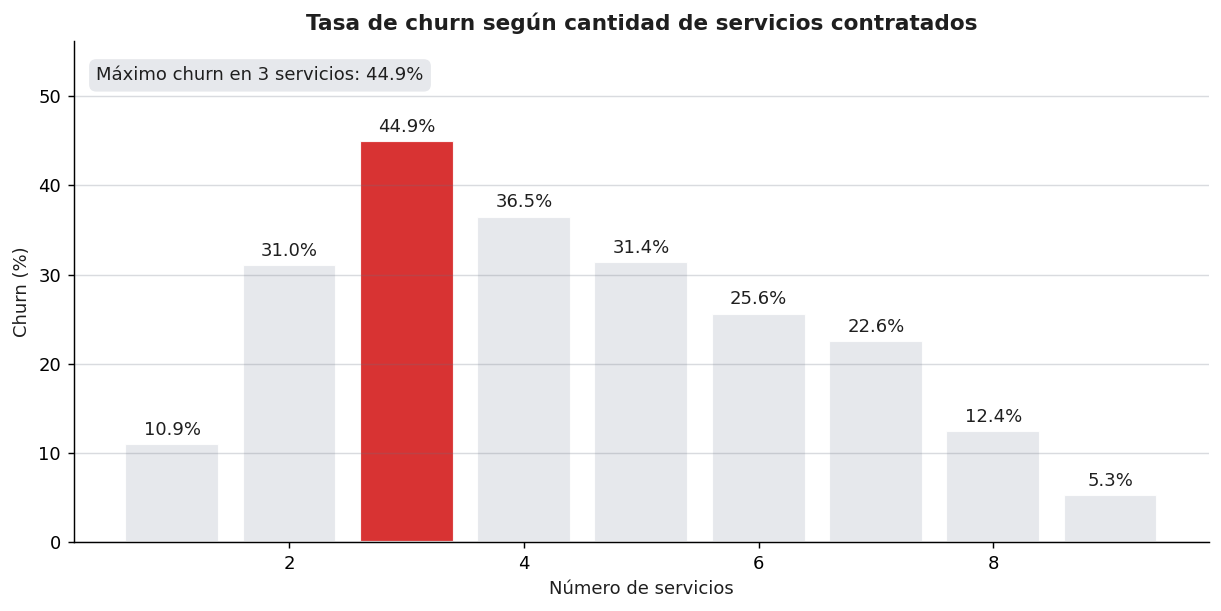

In [226]:
fig = churn_por_servicios_grafico_styled(churn_por_servicios)
fig.show()


In [227]:
counts, sty_counts = conteo_servicios_tabla_styled(df_final)
sty_counts


,Clientes
Número de servicios,
1,"1,260"
2,857
3,846
4,965
5,921
6,906
7,674
8,395
9,208


Interpretación del patrón

Se observa una relación no lineal entre la cantidad de servicios contratados y la evasión:

*   La tasa de churn aumenta de forma marcada desde 1 hasta 3 servicios, alcanzando su máximo en 3 servicios (~44.9%). Esto podría indicar que los clientes con un “paquete intermedio” aún están en una fase de prueba o perciben que el precio no compensa el valor recibido (asociación, no causalidad).

*   A partir de 4 servicios, el churn disminuye progresivamente, llegando a valores muy bajos en 8–9 servicios. Una interpretación plausible es que los clientes con muchos servicios están más “integrados” al ecosistema: tienen mayor dependencia, más personalización y un mayor costo de cambio, lo que reduce la probabilidad de cancelación.

*   El patrón es más confiable en los grupos con mayor volumen (por ejemplo, 1–7 servicios), mientras que los grupos con menos clientes (como 8–9) conviene reportarlos como segmentos más pequeños, aunque la tendencia general se mantiene.

# Informe Final — Análisis de Churn (Telecom X)

## Objetivo
Analizar la evasión de clientes (**churn**) e identificar patrones asociados a características del cliente, condiciones del contrato, métodos de pago, consumo y cantidad de servicios, con el fin de proponer acciones que reduzcan la cancelación del servicio.

## Dataset
El dataset contiene información demográfica, servicios contratados, condiciones de cuenta y cargos (mensual y total) por cliente.


## 1. Introducción

El churn (evasión) representa la pérdida de clientes que cancelan el servicio, lo cual impacta directamente en ingresos y crecimiento.  
El propósito de este análisis exploratorio es:

- **Cuantificar** el churn en la base total de clientes.
- **Detectar inconsistencias** en los datos y corregirlas para asegurar calidad.
- **Explorar patrones** en variables categóricas y numéricas.
- **Identificar segmentos de mayor riesgo** (contratos, pago, perfil, consumo, antigüedad).
- Proponer **recomendaciones estratégicas** basadas en evidencia.


## 2. Limpieza y Tratamiento de Datos

Se realizó:
- Normalización del JSON a un DataFrame plano (todas las variables en columnas).
- Validación de nulos, vacíos y valores inconsistentes.
- Eliminación de registros con churn vacío y cargos totales vacíos (casos mínimos).
- Conversión de tipos numéricos (por ejemplo, `cargo_total`).
- Codificación de variables binarias (Sí/No → 1/0).
- Estandarización de nombres de columnas para facilitar lectura.
- Creación de variables derivadas:
  - `Cuentas_Diarias = cargo_mensual / 30`
  - `num_servicios` (cantidad de servicios contratados)


In [228]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_cliente                  7032 non-null   object 
 1   churn                       7032 non-null   int64  
 2   genero                      7032 non-null   object 
 3   mayor_65                    7032 non-null   int64  
 4   tiene_pareja                7032 non-null   int64  
 5   tiene_dependientes          7032 non-null   int64  
 6   antiguedad_meses            7032 non-null   int64  
 7   servicio_telefonico         7032 non-null   int64  
 8   multiples_lineas            7032 non-null   object 
 9   servicio_internet           7032 non-null   object 
 10  seguridad_online            7032 non-null   object 
 11  backup_online               7032 non-null   object 
 12  proteccion_dispositivo      7032 non-null   object 
 13  soporte_tecnico             7032 non-n

,id_cliente,churn,genero,mayor_65,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefonico,multiples_lineas,servicio_internet,...,telefono_bin,multiples_lineas_bin,internet_bin,seguridad_online_bin,backup_online_bin,proteccion_dispositivo_bin,soporte_tecnico_bin,streaming_tv_bin,streaming_peliculas_bin,num_servicios
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,1,0,1,0,1,0,1,1,0,5
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,1,1,1,0,0,0,0,0,1,4
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,1,0,1,0,0,1,0,0,0,3
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,1,0,1,0,1,1,0,1,1,6
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,1,0,1,0,0,0,1,1,0,4


## 3. Análisis Exploratorio de Datos



### 3.1 Distribución global del churn
Visualiza la proporción de clientes que permanecen vs los que se dan de baja.


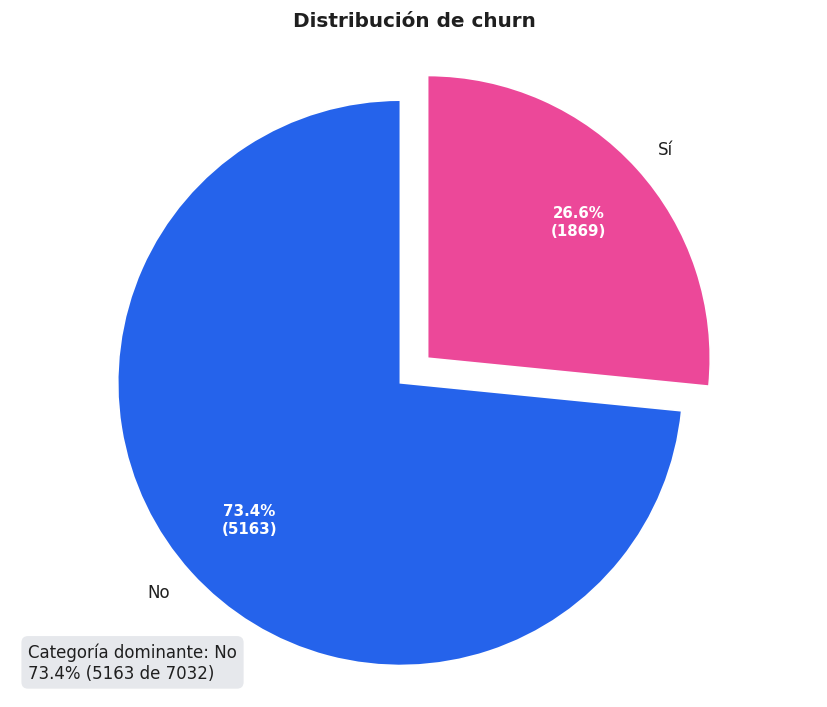

In [229]:
fig = pie_categoria_styled(df_final, "churn", title="Distribución de churn")
fig.show()

### 3.2 Distribución de características categóricas
Se analiza la composición de la base por variables como género, tercera edad, contrato, método de pago, etc.


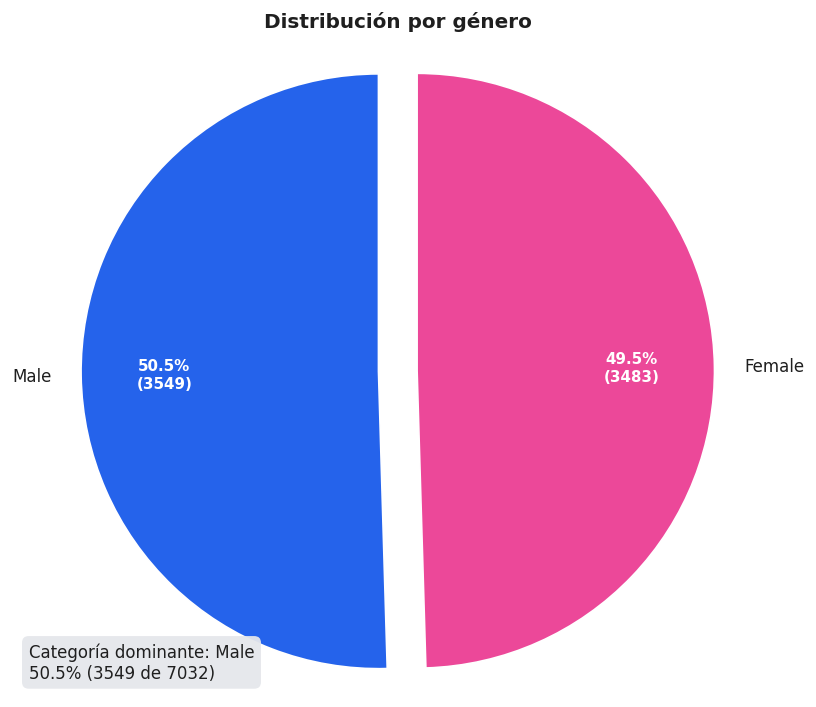

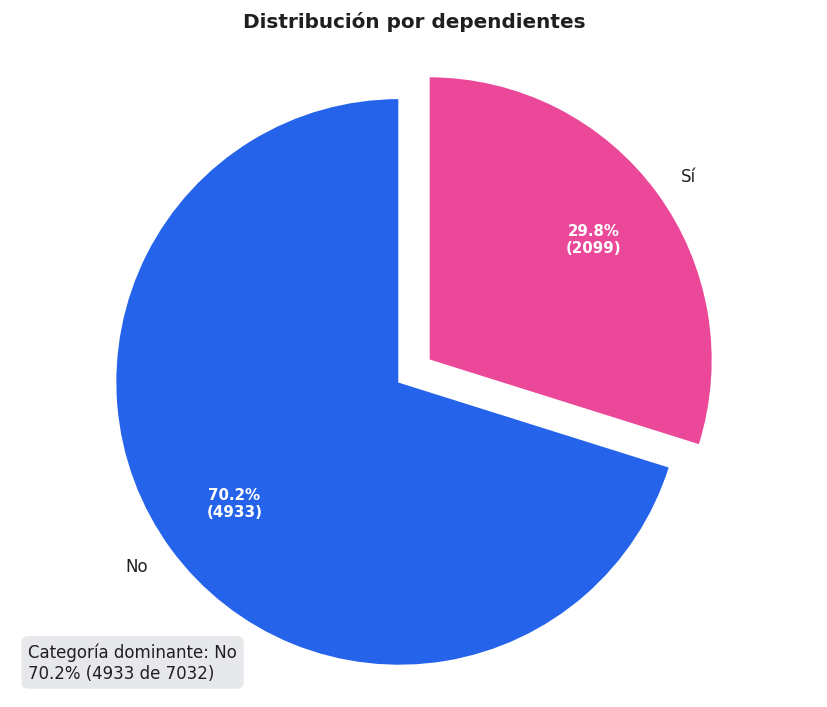

In [230]:
fig = pie_categoria_styled(df_final, "genero", title="Distribución por género")
fig.show()
fig = pie_categoria_styled(df_final, "tiene_dependientes", title="Distribución por dependientes")
fig.show()

### 3.3 Recuento de churn por variables categóricas (segmentado)
Se evalúa cómo cambia la tasa de churn en distintas categorías para identificar segmentos de mayor riesgo.


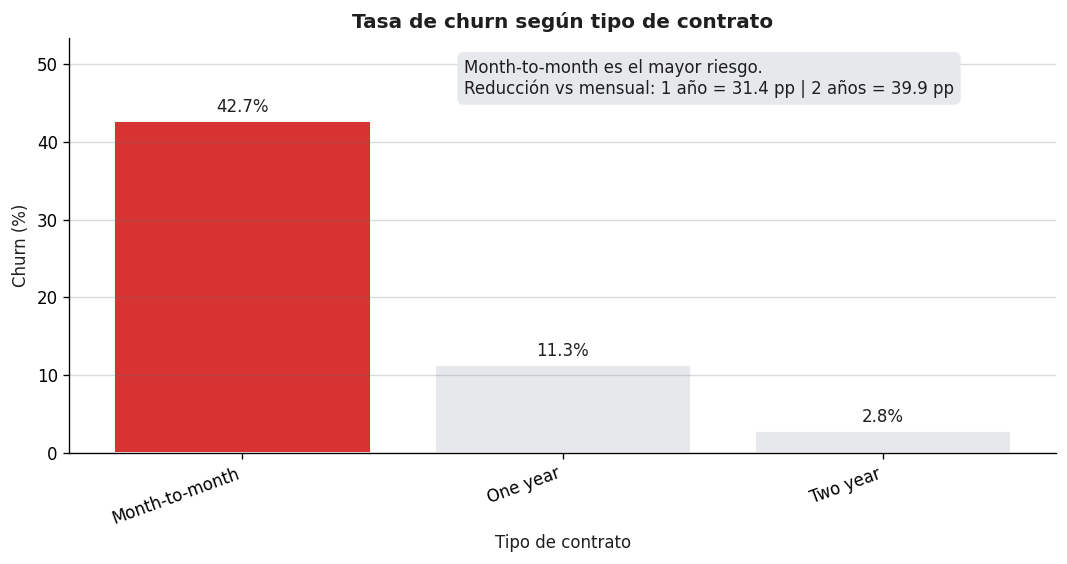

In [231]:
sty, fig = contrato_vs_churn_styled(df_final)
sty
fig.show()

### 3.4 Variables numéricas (segmentadas por churn)
Se comparan distribuciones numéricas entre clientes que permanecen y los que abandonan, usando boxplots e histogramas.


In [232]:
num_cols = ["antiguedad_meses", "cargo_mensual", "cargo_total", "Cuentas_Diarias"]
mini, sty = mini_tabla_numericas_por_churn_styled(df_final, num_cols)
sty


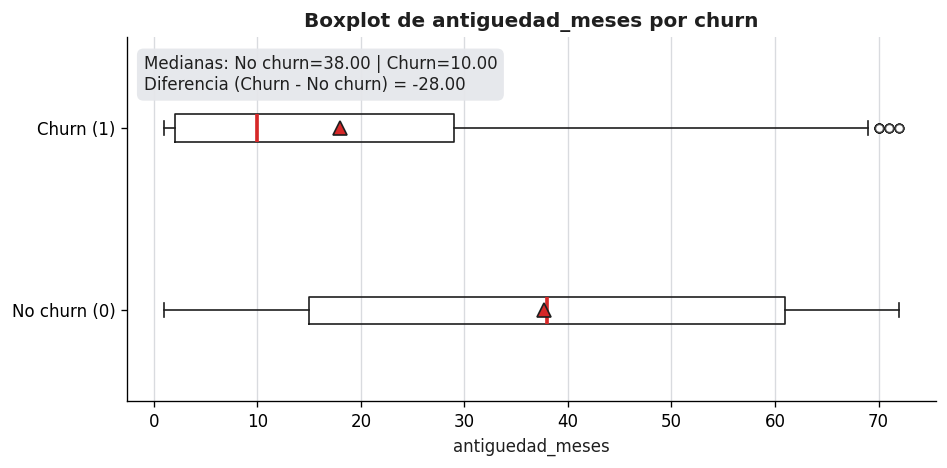

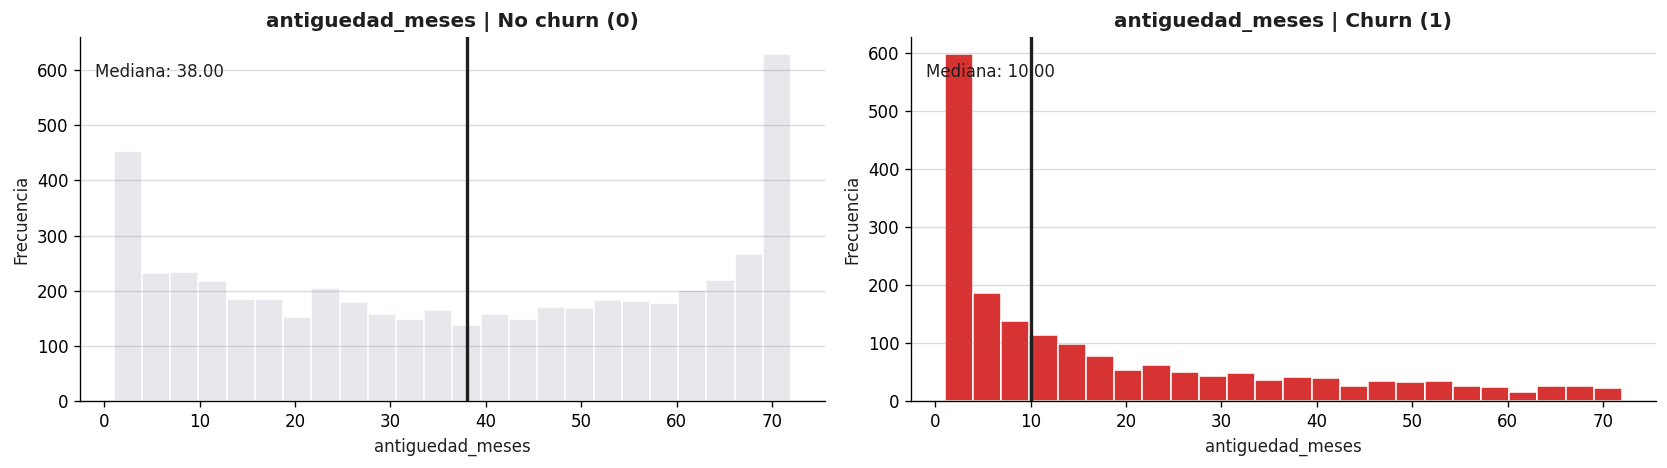

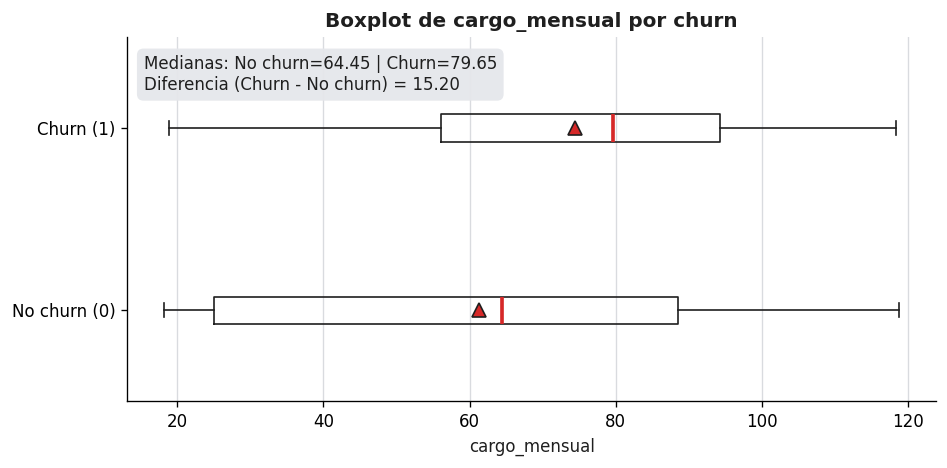

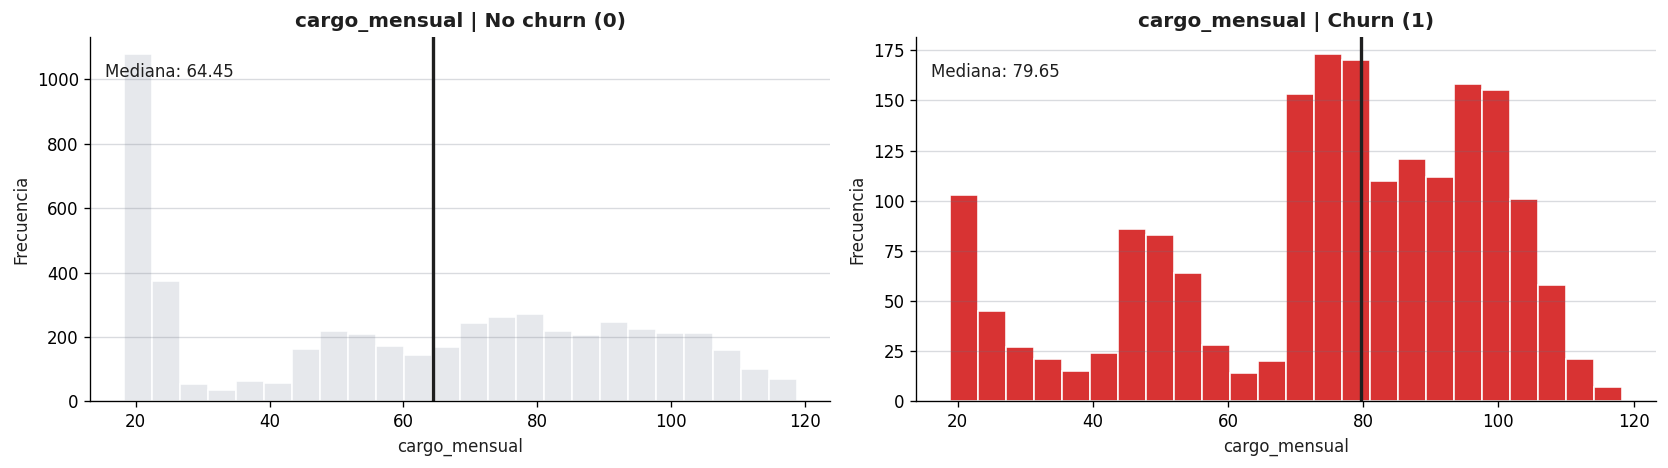

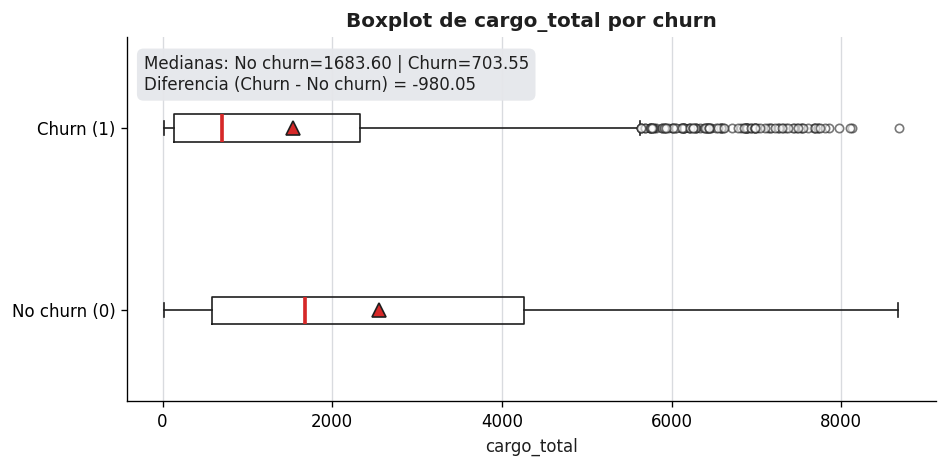

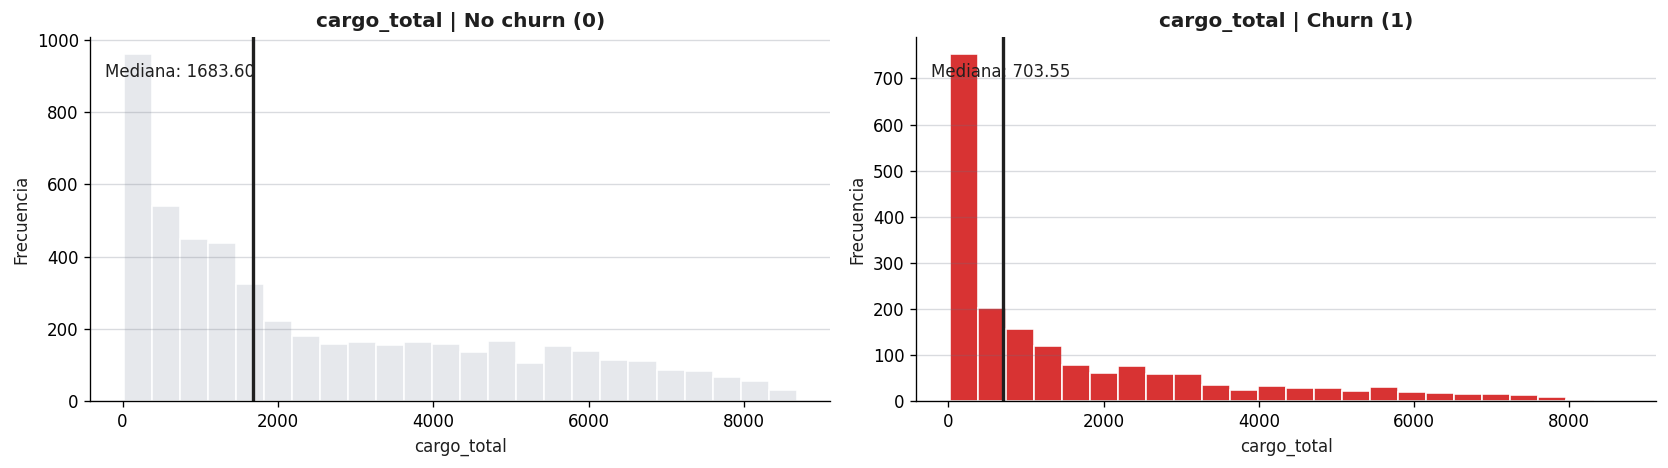

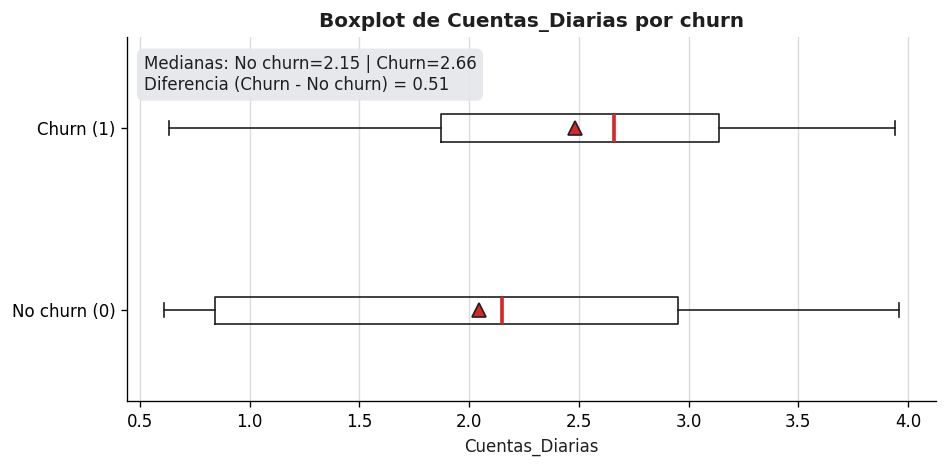

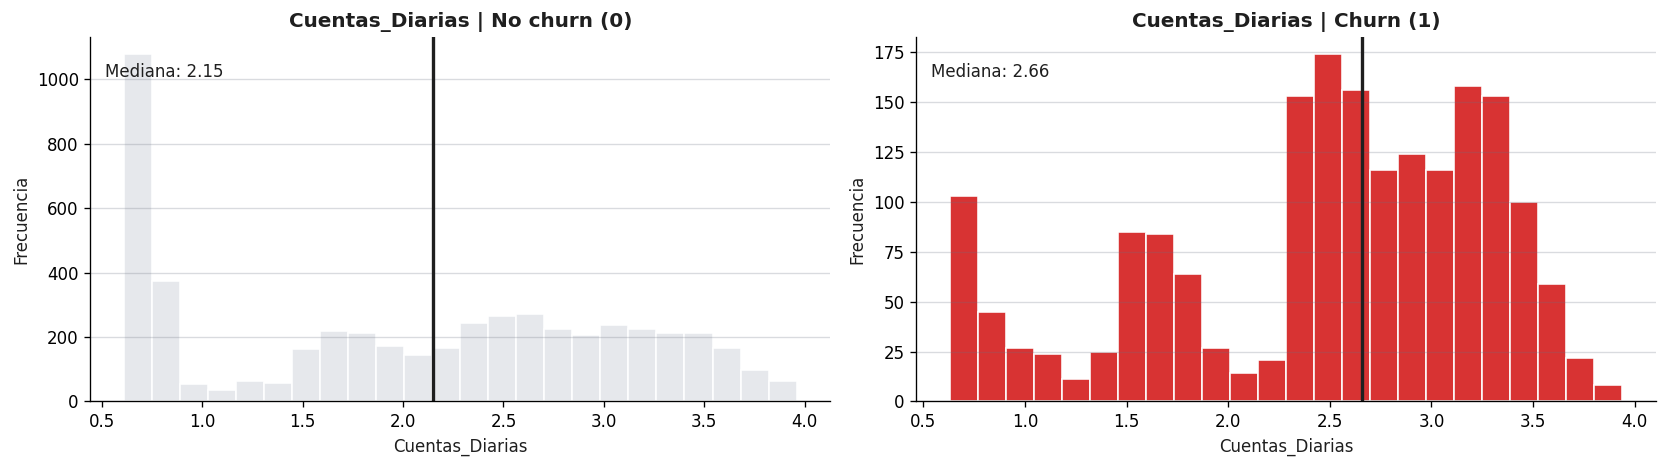

In [233]:
for col in num_cols:
    fig1 = boxplot_por_churn_styled(df_final, col)
    fig1.show()

    fig2 = hist_por_churn_styled(df_final, col, bins=24)
    fig2.show()


## 4. Análisis adicional: correlación (Pearson)

Se calcula la correlación lineal entre churn y variables numéricas.
> La correlación no implica causalidad, solo asociación lineal.


In [234]:
num_cols = ["antiguedad_meses", "cargo_mensual", "cargo_total", "Cuentas_Diarias"]
corr_churn, sty = corr_churn_styled(df_final, num_cols)
sty


,Correlación
Variable,
churn,+1.000
Cuentas_Diarias,+0.193
cargo_mensual,+0.193
cargo_total,-0.199
antiguedad_meses,-0.354


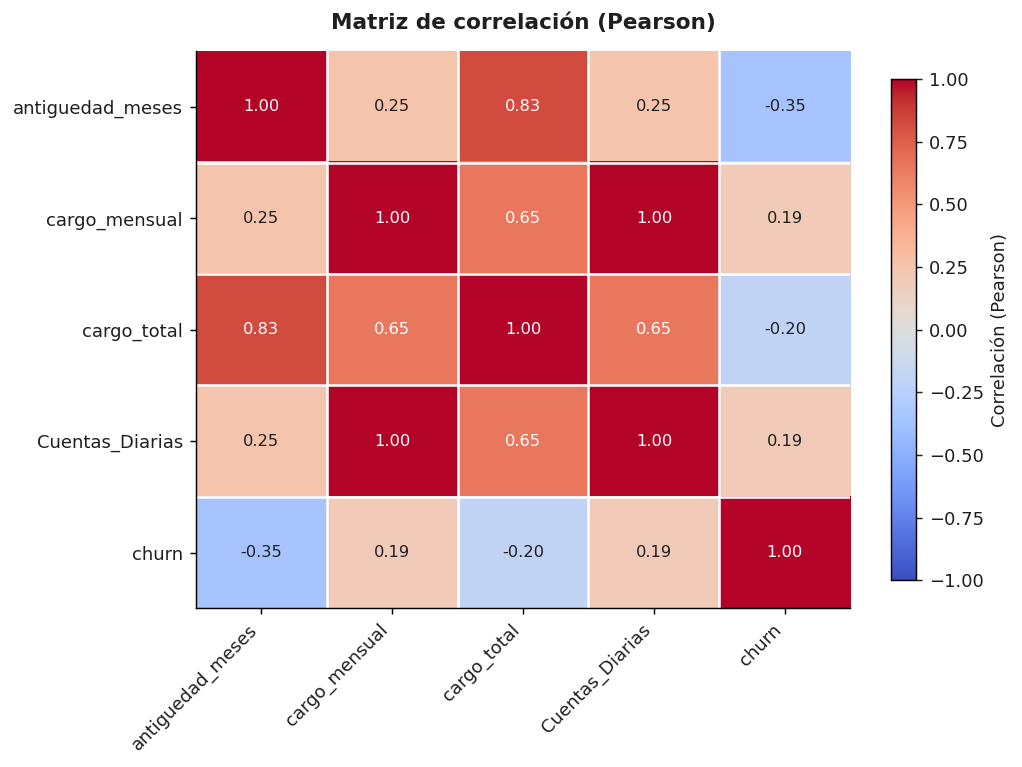

In [235]:
fig = matriz_correlacion_styled(df_final, num_cols + ["churn"])
fig.show()

## 5. Análisis por cantidad de servicios contratados (num_servicios)
Se evalúa si la cantidad de servicios contratados se asocia a mayor o menor churn.


In [236]:
churn_por_servicios, sty = churn_por_servicios_tabla_styled(df_final)
sty


,Churn (%)
Número de servicios,
1,10.95%
2,31.04%
3,44.92%
4,36.48%
5,31.38%
6,25.61%
7,22.55%
8,12.41%
9,5.29%


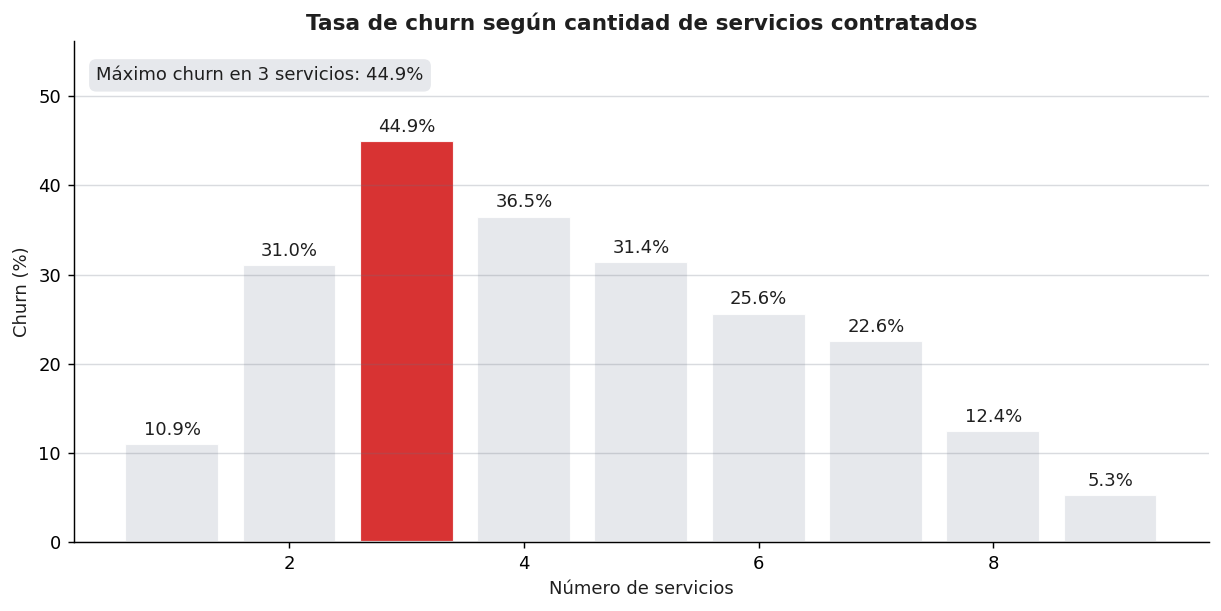

In [237]:
fig = churn_por_servicios_grafico_styled(churn_por_servicios)
fig.show()


In [238]:
counts, sty_counts = conteo_servicios_tabla_styled(df_final)
sty_counts


,Clientes
Número de servicios,
1,"1,260"
2,857
3,846
4,965
5,921
6,906
7,674
8,395
9,208


## 6. Conclusiones e Insights

1) **Antigüedad es el factor numérico más asociado al churn**: los clientes con menor antigüedad concentran la mayor parte de cancelaciones.  
2) **Tipo de contrato es el driver categórico más fuerte**: el contrato *month-to-month* presenta una tasa de churn muy superior a contratos de 1 o 2 años.  
3) **Método de pago muestra diferencias muy marcadas**: *cheque electrónico* tiene el mayor churn, mientras que pagos automáticos presentan menor churn.  
4) **Factura digital se asocia a mayor churn**: clientes con facturación digital cancelan más, posiblemente por perfil digital o combinación con contrato mensual/pago no automático.  
5) **Adultos mayores presentan mayor riesgo**: el churn en mayores de 65 años es considerablemente más alto que en el resto.  
6) **Efecto hogar (pareja y dependientes)**: tener pareja o dependientes se asocia a menor churn, lo que sugiere mayor estabilidad/uso compartido.  
7) **Cantidad de servicios (num_servicios)**: se observa un patrón no lineal, con mayor churn en paquetes intermedios (por ejemplo 2–3 servicios) y menor churn cuando el cliente contrata muchos servicios (mayor integración y costo de cambio).


## 7. Recomendaciones

1) **Migrar clientes month-to-month a contratos largos**
- Ofrecer descuentos, beneficios por permanencia o upgrades por migrar a 1–2 años.
- Campañas específicas para clientes con baja antigüedad (primeros 3–6 meses).

2) **Reducir churn asociado a “cheque electrónico”**
- Incentivar autopago (tarjeta/transferencia automática) con un bono o descuento.
- Mejorar experiencia de pago (recordatorios, facilidad, evitar fallas).

3) **Estrategias para clientes de alta factura digital**
- Revisar si se concentran en contratos mensuales y/o cheque electrónico.
- Mejorar onboarding digital y soporte (evitar fricción que acelere la cancelación).

4) **Retención enfocada en adultos mayores**
- Soporte prioritario y comunicación más clara.
- Planes adaptados (simplicidad, estabilidad, beneficios por permanencia).

5) **Mejorar “valor percibido” en paquetes intermedios (2–3 servicios)**
- Ajustar bundles: más beneficios por el mismo precio o escalamiento gradual.
- Ofertas de upgrade hacia 4+ servicios (reduciendo churn por mayor integración).

6) **Acciones tempranas de retención (early churn)**
- Programas de seguimiento en los primeros meses.
- Intervención preventiva ante altos cargos mensuales (ajustes, optimización del plan).
